# Lending Club loan data

## import library

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
import matplotlib.font_manager as fm

font_path = '../../../../usr/share/fonts/truetype/nanum/NanumSquareR.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16

## load dataset

In [3]:
df_origin = pd.read_csv('data/LendingClub_loandata/2015.csv',
                        low_memory=False
                        )

## feature selecting

In [4]:
select_cols = ['loan_status', ## 타겟 변수: 대출 상태
               
               'annual_inc', ## 수치형 변수: 연수입
               'dti', ## 수치형 변수: 총부채 상환비율
               'loan_amnt', ## 수치형 변수: 신청 대출 금액
               'revol_bal', 'revol_util', ## 수치형 변수: 리볼빙 관련
               'fico_range_low', 'fico_range_high', ## 수치형 변수: 신용 점수
               'pub_rec', ## 수치형 변수: 공공 파산/압류 기록
               'delinq_2yrs', ## 수치형 변수: 지난 2년간 30일 이상 연체한 횟수
               
               'term', ## 범주형 변수: 상환 기간 (원핫 대상)
               'home_ownership', ## 범주형 변수: 거주 형태 (원핫 대상)
            #    'purpose', ## 범주형 변수: 대출 목적 (원핫 대상)
               
               'emp_length', ## 범주형 변수: 근속연수 (전처리 및 수치형 변수 변환)
               ]

In [5]:
df = df_origin[ select_cols ]

## EDA

### 단변량 분석

#### 범주형 변수: Y

/tmp/ipykernel_874/3400438719.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='loan_status', palette='Set2')


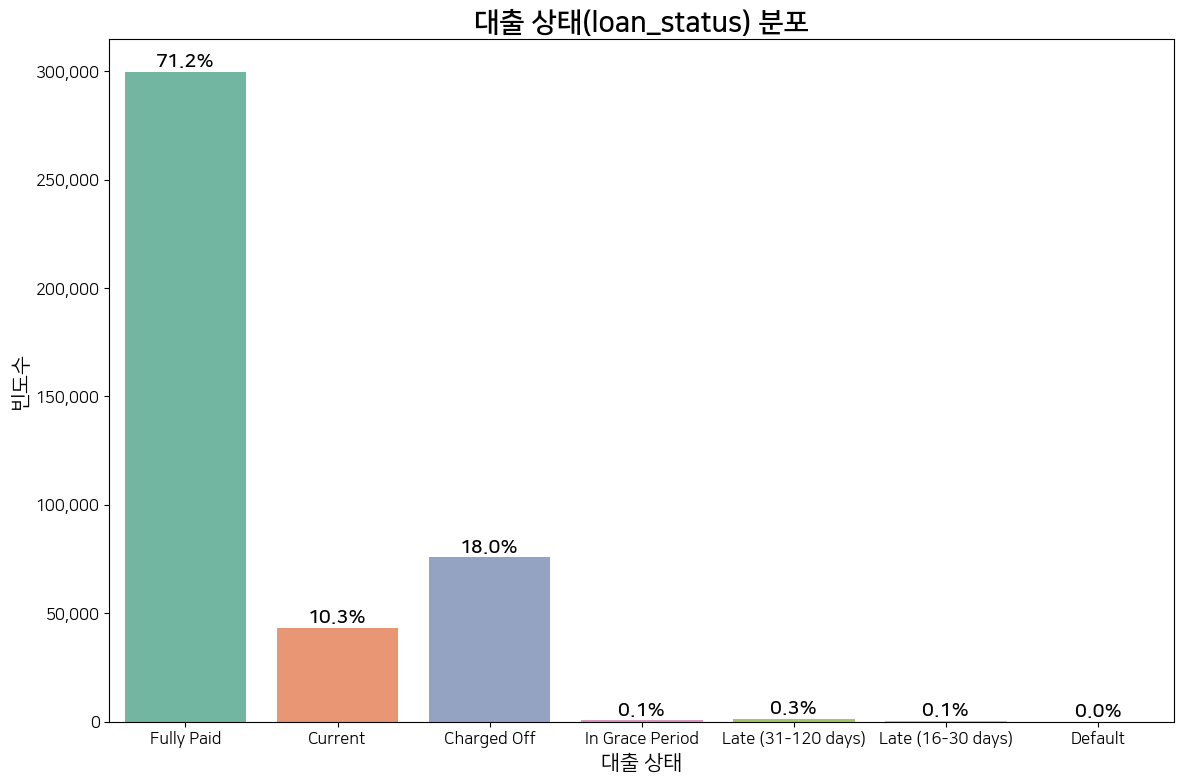

In [23]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='loan_status', palette='Set2')

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ratio = height / total * 100
    
    ax.text(p.get_x() + p.get_width() / 2,
            height + total*0.005,
            f'{ratio:.1f}%',
            ha='center',
            fontsize=14,
            color='black',
            fontweight='semibold',
            )

# comma_formatter = FuncFormatter(add_comma)
comma_formatter = FuncFormatter(lambda value, pos: f'{int(value):,}')

# ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('대출 상태(loan_status) 분포', fontsize=20, weight='bold')
ax.set_xlabel('대출 상태', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

데이터 불균형 뚜렷함.

#### 범주형 변수: X

/tmp/ipykernel_874/1546035677.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='home_ownership', palette='Set2')


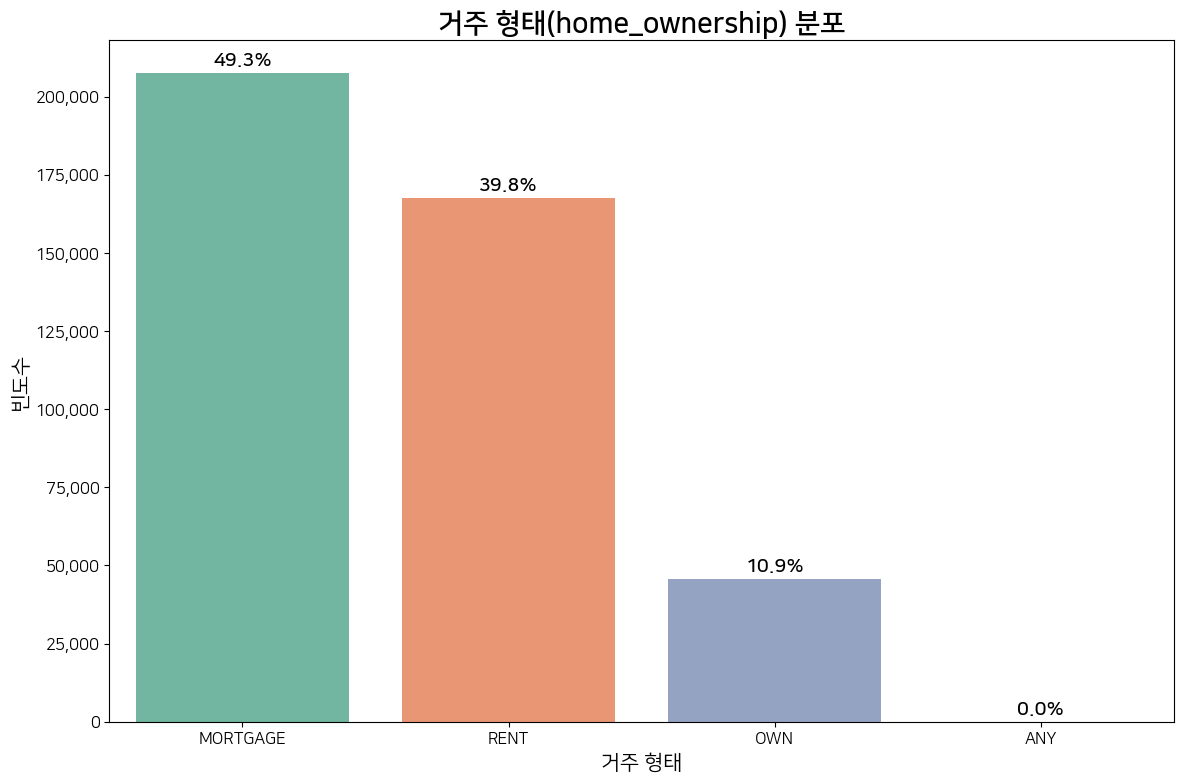

In [22]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='home_ownership', palette='Set2')

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ratio = height / total * 100
    
    ax.text(p.get_x() + p.get_width() / 2,
            height + total*0.005,
            f'{ratio:.1f}%',
            ha='center',
            fontsize=14,
            color='black',
            fontweight='semibold',
            )

comma_formatter = FuncFormatter(lambda value, pos: f'{int(value):,}')

# ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('거주 형태(home_ownership) 분포', fontsize=20, weight='bold')
ax.set_xlabel('거주 형태', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_874/1913350400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='term', palette='Set2')


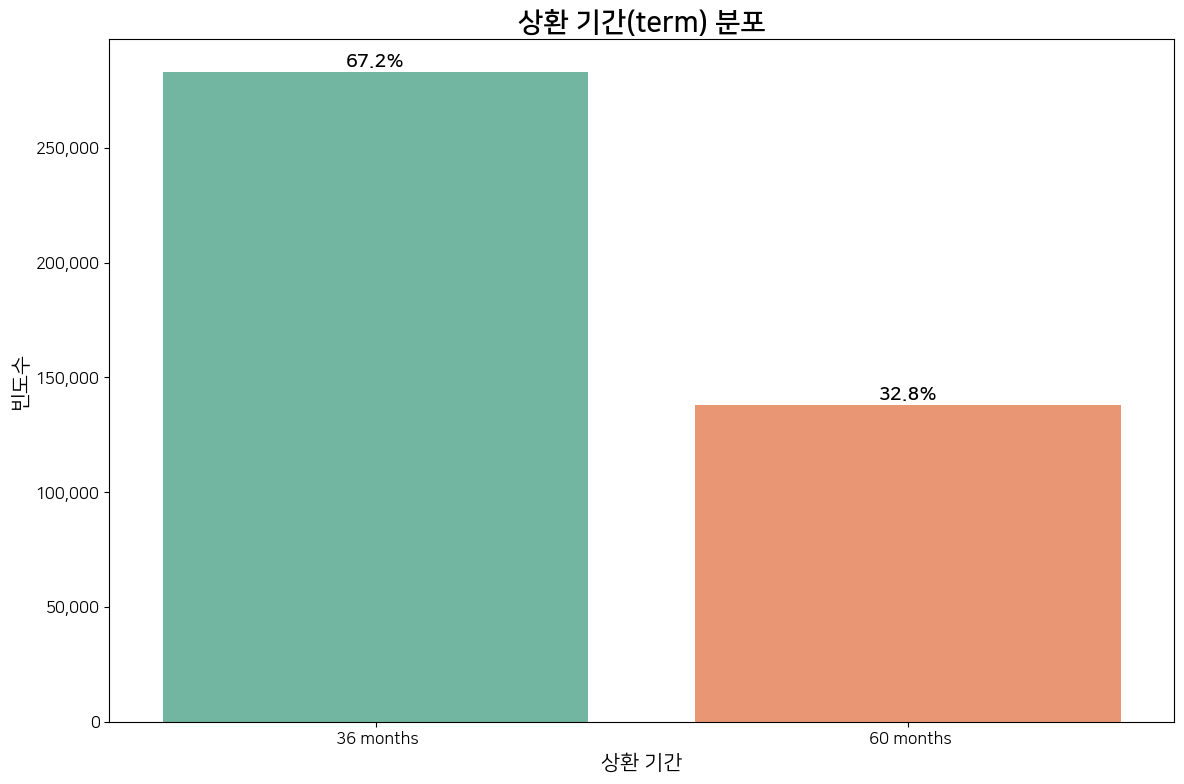

In [25]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='term', palette='Set2')

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ratio = height / total * 100
    
    ax.text(p.get_x() + p.get_width() / 2,
            height + total*0.005,
            f'{ratio:.1f}%',
            ha='center',
            fontsize=14,
            color='black',
            fontweight='semibold',
            )

comma_formatter = FuncFormatter(lambda value, pos: f'{int(value):,}')

# ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('상환 기간(term) 분포', fontsize=20, weight='bold')
ax.set_xlabel('상환 기간', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_874/3735007320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='emp_length', palette='Set2')


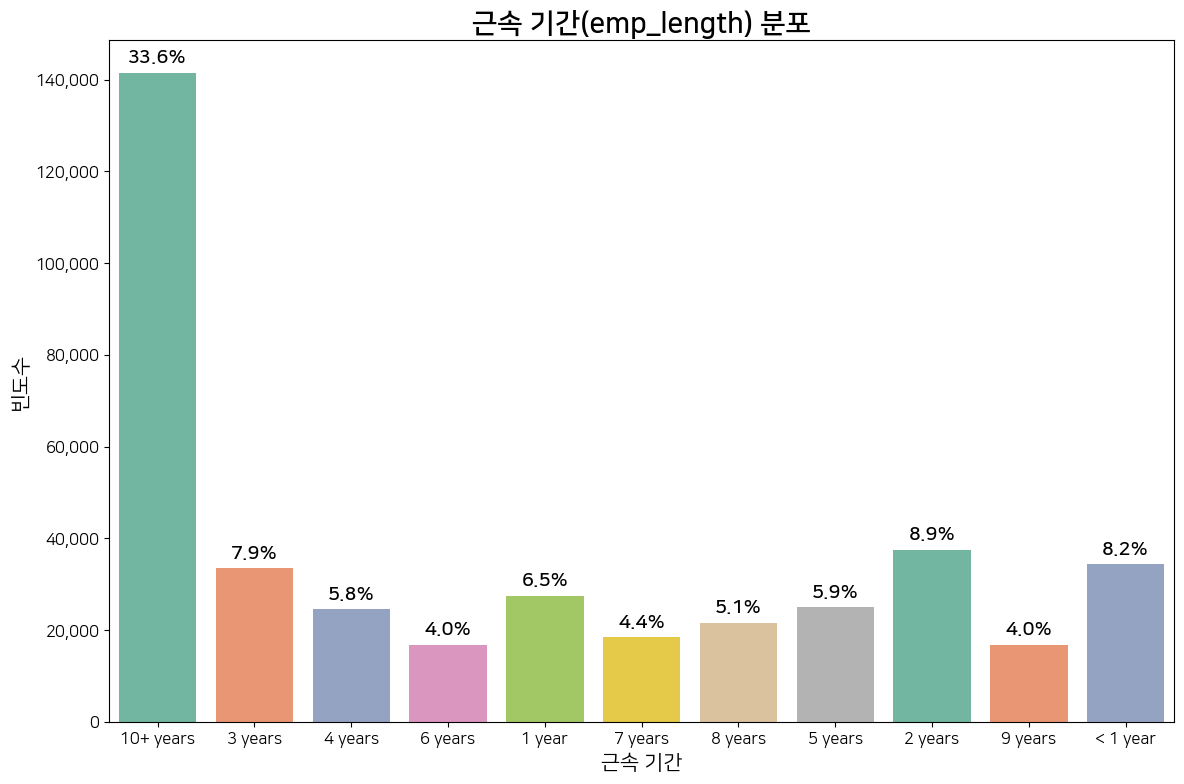

In [26]:
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='emp_length', palette='Set2')

total = len(df)

for p in ax.patches:
    height = p.get_height()
    ratio = height / total * 100
    
    ax.text(p.get_x() + p.get_width() / 2,
            height + total*0.005,
            f'{ratio:.1f}%',
            ha='center',
            fontsize=14,
            color='black',
            fontweight='semibold',
            )

comma_formatter = FuncFormatter(lambda value, pos: f'{int(value):,}')

# ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('근속 기간(emp_length) 분포', fontsize=20, weight='bold')
ax.set_xlabel('근속 기간', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### 수치형 변수: X

- 연소득(annual_inc)

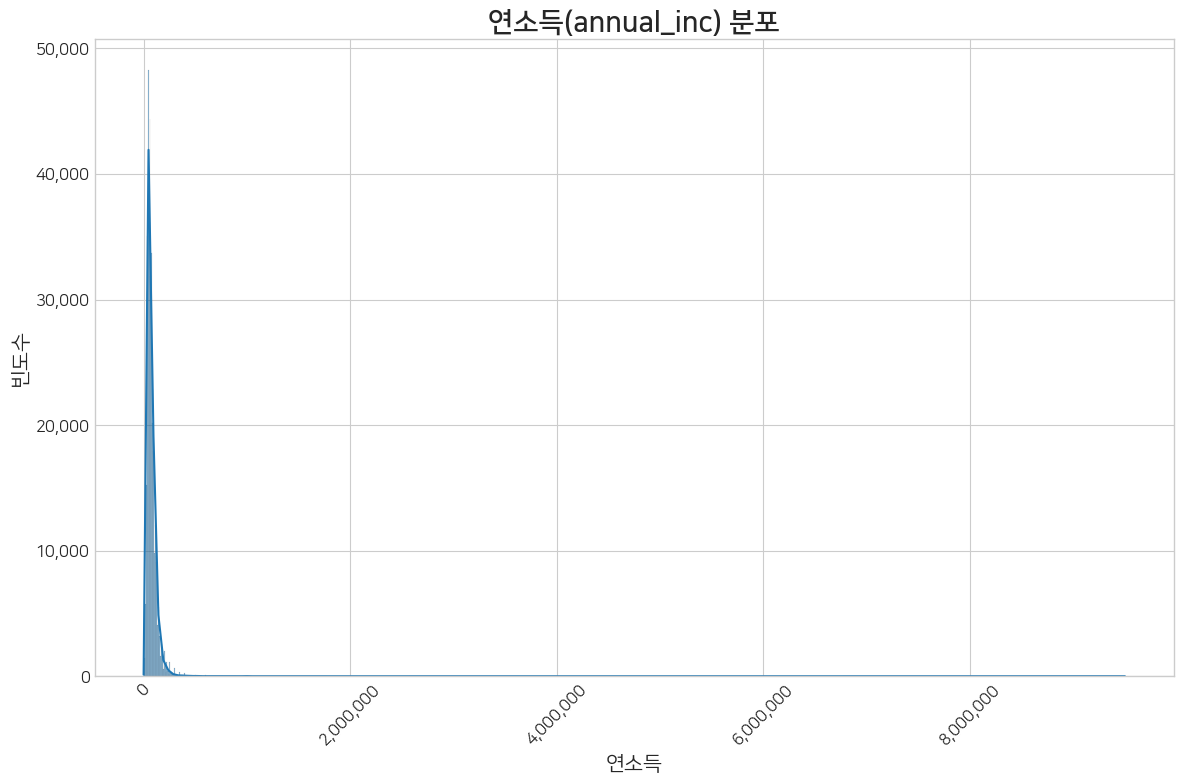

In [86]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='annual_inc', kde=True)

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('연소득(annual_inc) 분포', fontsize=20, weight='bold')
ax.set_xlabel('연소득', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

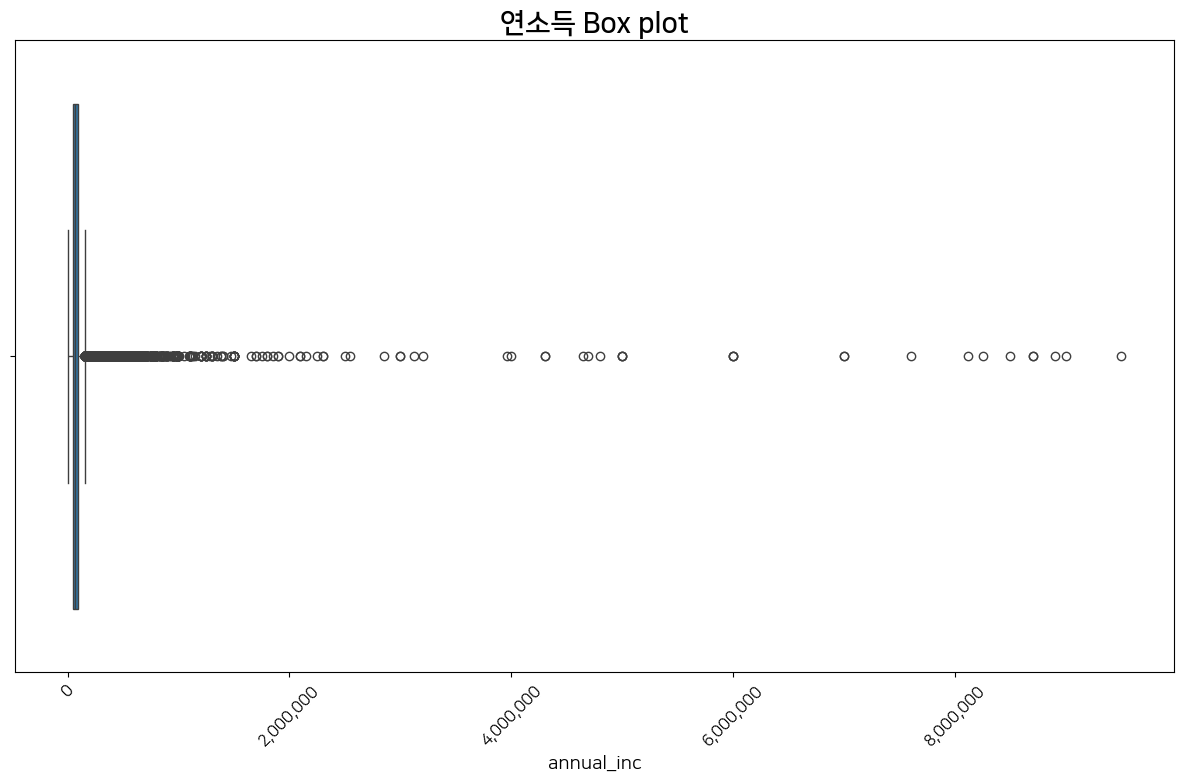

In [16]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='annual_inc')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('연소득 Box plot', fontsize=20, weight='bold')
# ax.set_xlabel('연소득', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
df['annual_inc'].value_counts()

annual_inc
60000.00    16301
50000.00    14626
65000.00    12287
70000.00    11685
80000.00    11088
            ...  
54180.00        1
34573.00        1
27462.96        1
44375.00        1
28484.28        1
Name: count, Length: 26903, dtype: int64

In [18]:
df.loc[ df['annual_inc']==9500000 ]

,loan_status,annual_inc,dti,loan_amnt,revol_bal,revol_util,fico_range_low,fico_range_high,pub_rec,delinq_2yrs,term,home_ownership,emp_length
230972,Charged Off,9500000.0,0.12,24000.0,16854.0,22.0,725.0,729.0,0.0,0.0,60 months,MORTGAGE,10+ years


- DTI(총부채 상환 비율)

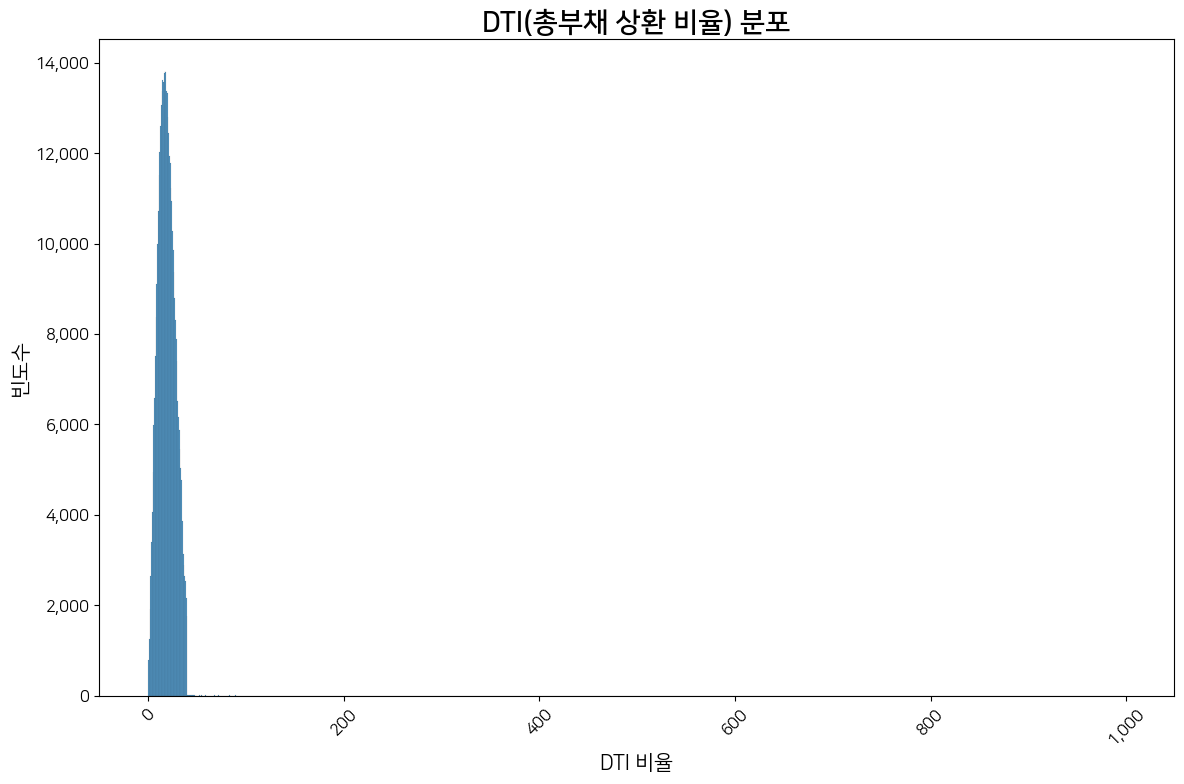

In [19]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='dti')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('DTI(총부채 상환 비율) 분포', fontsize=20, weight='bold')
ax.set_xlabel('DTI 비율', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
df['dti'].describe()

count    421093.000000
mean         19.148367
std           8.885104
min           0.000000
25%          12.590000
50%          18.600000
75%          25.340000
max         999.000000
Name: dti, dtype: float64

In [21]:
df['dti'].value_counts()

dti
19.20    303
18.00    296
21.60    286
15.60    285
13.20    274
        ... 
55.10      1
44.22      1
59.19      1
42.17      1
0.01       1
Name: count, Length: 4085, dtype: int64

In [22]:
df.loc[ df['dti']>100, ] ## 전처리 대상 ## 정말 이상치라 할 수 있는 값들은 아래에서 제거된다.

,loan_status,annual_inc,dti,loan_amnt,revol_bal,revol_util,fico_range_low,fico_range_high,pub_rec,delinq_2yrs,term,home_ownership,emp_length
8721,Fully Paid,1770.0,999.00,6550.0,29029.0,84.4,670.0,674.0,0.0,2.0,36 months,MORTGAGE,NaN
10548,Fully Paid,20000.0,137.40,15000.0,21143.0,66.9,700.0,704.0,1.0,0.0,36 months,MORTGAGE,NaN
13700,Current,17000.0,136.97,28000.0,9784.0,32.1,675.0,679.0,1.0,0.0,60 months,RENT,9 years
22841,Fully Paid,27000.0,100.09,20000.0,30379.0,97.4,685.0,689.0,0.0,0.0,60 months,RENT,< 1 year
55648,Fully Paid,8700.0,120.66,15000.0,7332.0,15.3,750.0,754.0,1.0,0.0,36 months,MORTGAGE,NaN
66461,Fully Paid,5000.0,380.53,19000.0,19104.0,33.3,675.0,679.0,0.0,0.0,60 months,MORTGAGE,1 year
73833,Fully Paid,1200.0,672.52,12000.0,1661.0,72.2,680.0,684.0,0.0,0.0,36 months,RENT,NaN
77957,Fully Paid,9745.0,125.25,12000.0,11216.0,51.0,665.0,669.0,1.0,0.0,60 months,MORTGAGE,NaN
97333,Fully Paid,12000.0,104.00,5000.0,5587.0,48.6,685.0,689.0,0.0,1.0,36 months,MORTGAGE,5 years


In [23]:
            #    'annual_inc', ## 수치형 변수: 연수입
            #    'dti', ## 수치형 변수: 총부채 상환비율
            #    'loan_amnt', ## 수치형 변수: 신청 대출 금액
            #    'revol_bal', 'revol_util', ## 수치형 변수: 리볼빙 관련 하나는 리볼빙 잔액, 하나는 비율
            #    'fico_range_low', 'fico_range_high', ## 수치형 변수: 신용 점수
            #    'pub_rec', ## 수치형 변수: 공공 파산/압류 기록
            #    'delinq_2yrs', ## 수치형 변수: 지난 2년간 30일 이상 연체한 횟수

- 대출 신청 금액(loan_amnt)

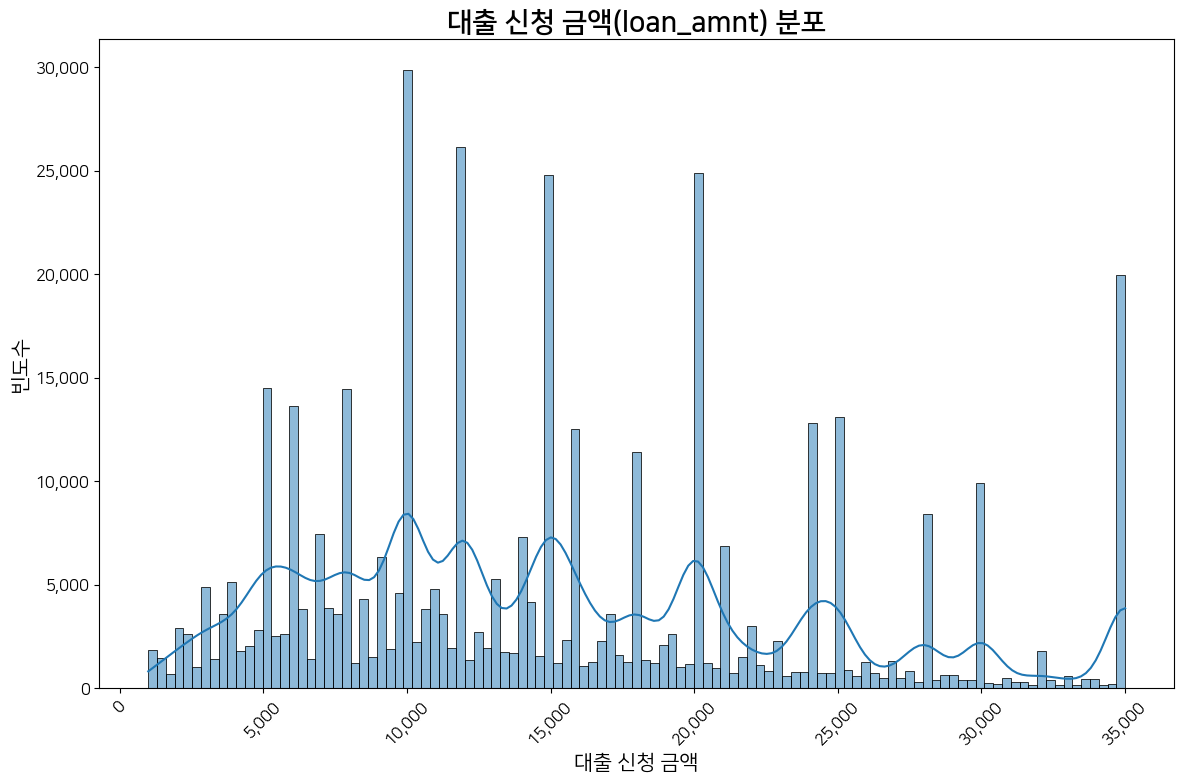

In [24]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='loan_amnt', kde=True)

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('대출 신청 금액(loan_amnt) 분포', fontsize=20, weight='bold')
ax.set_xlabel('대출 신청 금액', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

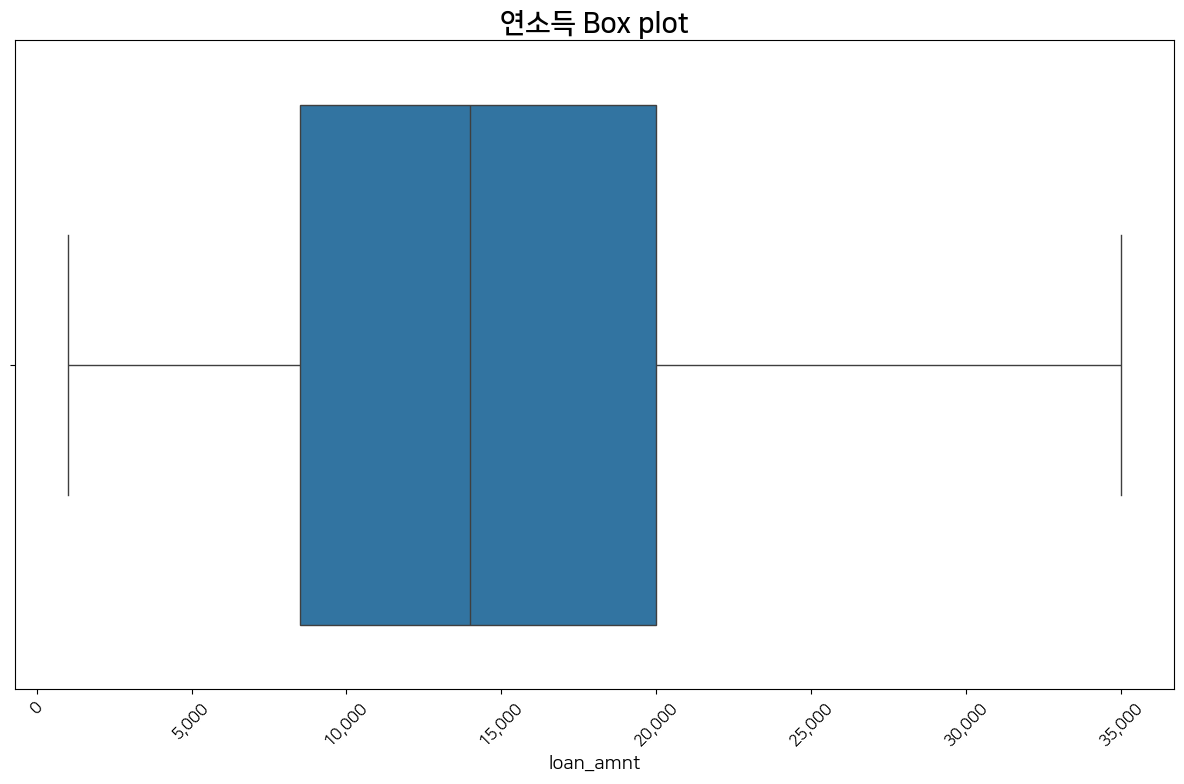

In [25]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='loan_amnt')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('연소득 Box plot', fontsize=20, weight='bold')
# ax.set_xlabel('연소득', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

- 리볼빙 잔액(revol_bal)

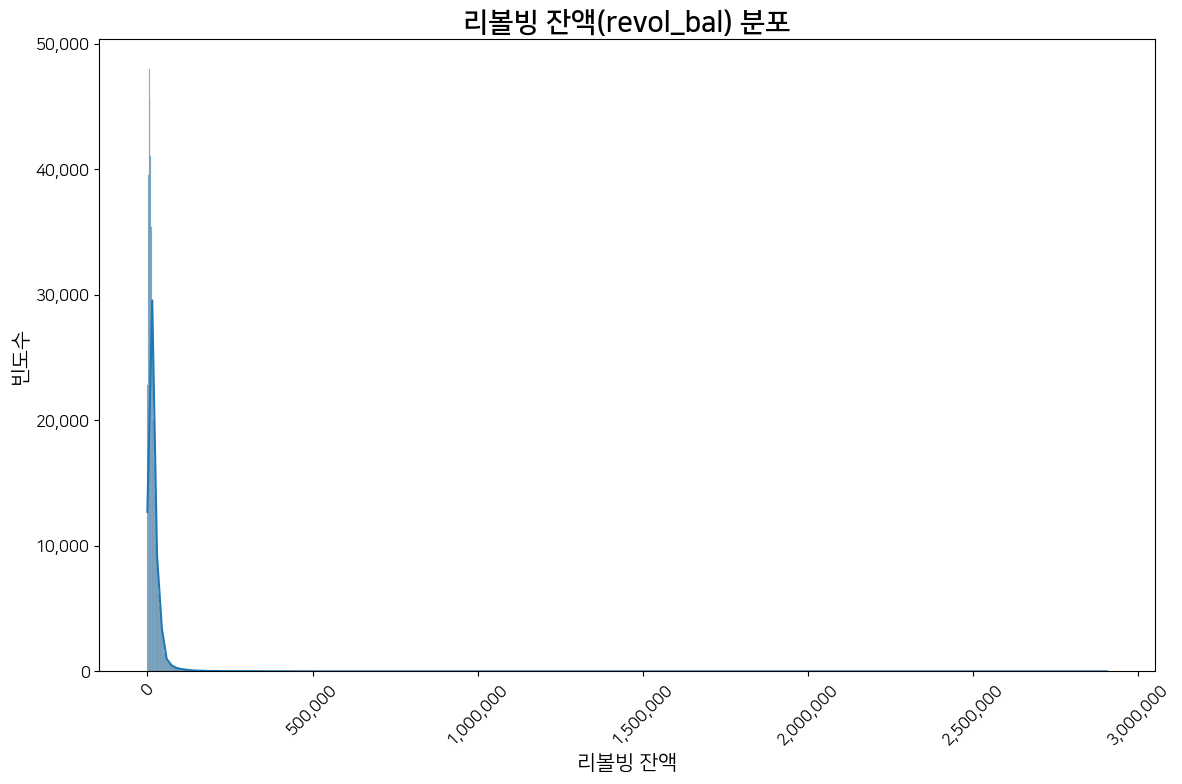

In [26]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='revol_bal', kde=True)

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('리볼빙 잔액(revol_bal) 분포', fontsize=20, weight='bold')
ax.set_xlabel('리볼빙 잔액', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

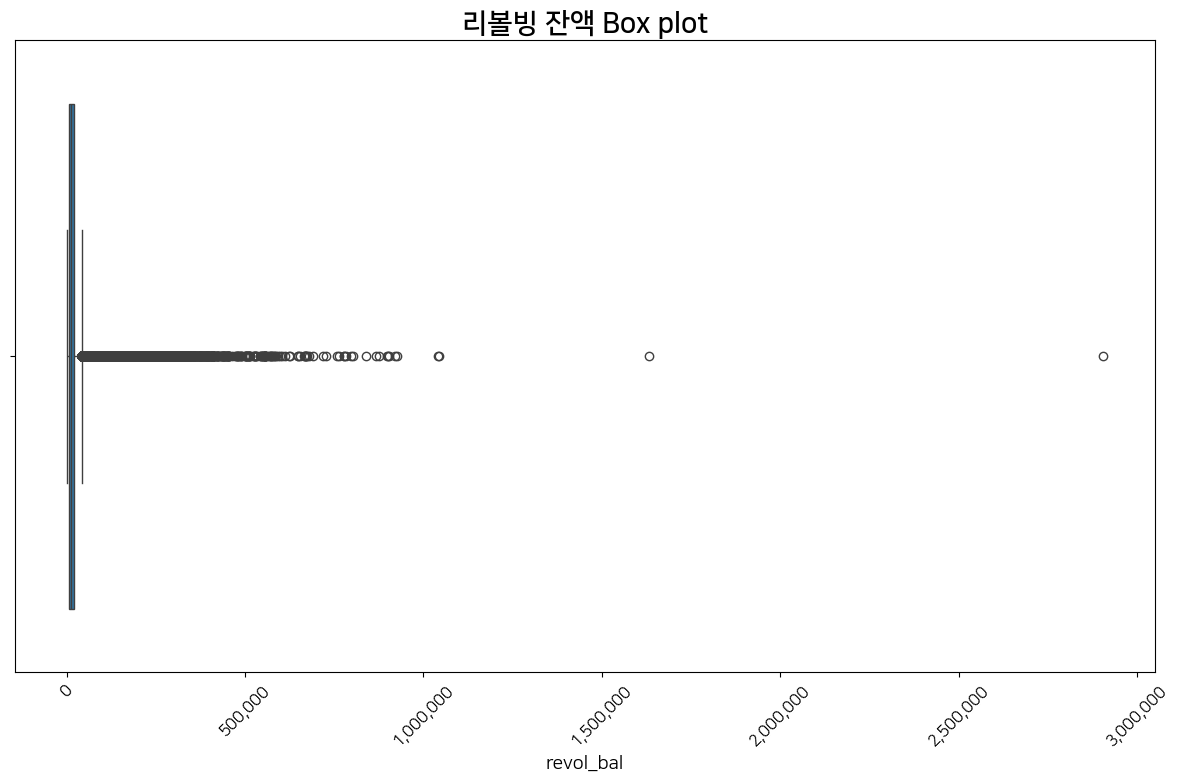

In [32]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='revol_bal')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('리볼빙 잔액 Box plot', fontsize=20, weight='bold')
# ax.set_xlabel('연소득', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [28]:
df['revol_bal'].describe()

count    4.210950e+05
mean     1.768548e+04
std      2.419503e+04
min      0.000000e+00
25%      6.480000e+03
50%      1.199600e+04
75%      2.142800e+04
max      2.904836e+06
Name: revol_bal, dtype: float64

In [29]:
df.loc[ df['revol_bal'] > df['revol_bal'].mean() ]

,loan_status,annual_inc,dti,loan_amnt,revol_bal,revol_util,fico_range_low,fico_range_high,pub_rec,delinq_2yrs,term,home_ownership,emp_length
1,Fully Paid,65000.0,16.06,24700.0,21470.0,19.2,715.0,719.0,0.0,1.0,36 months,MORTGAGE,10+ years
4,Fully Paid,104433.0,25.37,10400.0,21929.0,64.5,695.0,699.0,0.0,1.0,60 months,MORTGAGE,3 years
6,Fully Paid,180000.0,14.67,20000.0,87329.0,84.5,680.0,684.0,0.0,0.0,36 months,MORTGAGE,10+ years
11,Current,70000.0,26.40,16000.0,28705.0,56.3,720.0,724.0,0.0,0.0,60 months,MORTGAGE,1 year
12,Fully Paid,64000.0,34.95,1400.0,37828.0,67.2,700.0,704.0,0.0,0.0,36 months,MORTGAGE,3 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421075,Current,92000.0,29.60,26500.0,75645.0,65.1,725.0,729.0,0.0,1.0,60 months,MORTGAGE,10+ years
421078,Fully Paid,65000.0,17.09,21000.0,23356.0,30.6,755.0,759.0,0.0,0.0,36 months,MORTGAGE,10+ years
421088,Fully Paid,25400.0,27.08,11575.0,18266.0,65.0,680.0,684.0,0.0,0.0,36 months,RENT,10+ years
421089,Charged Off,63000.0,23.69,12000.0,21110.0,69.7,685.0,689.0,0.0,1.0,36 months,MORTGAGE,< 1 year


- 리볼빙 사용 비율(revol_util)

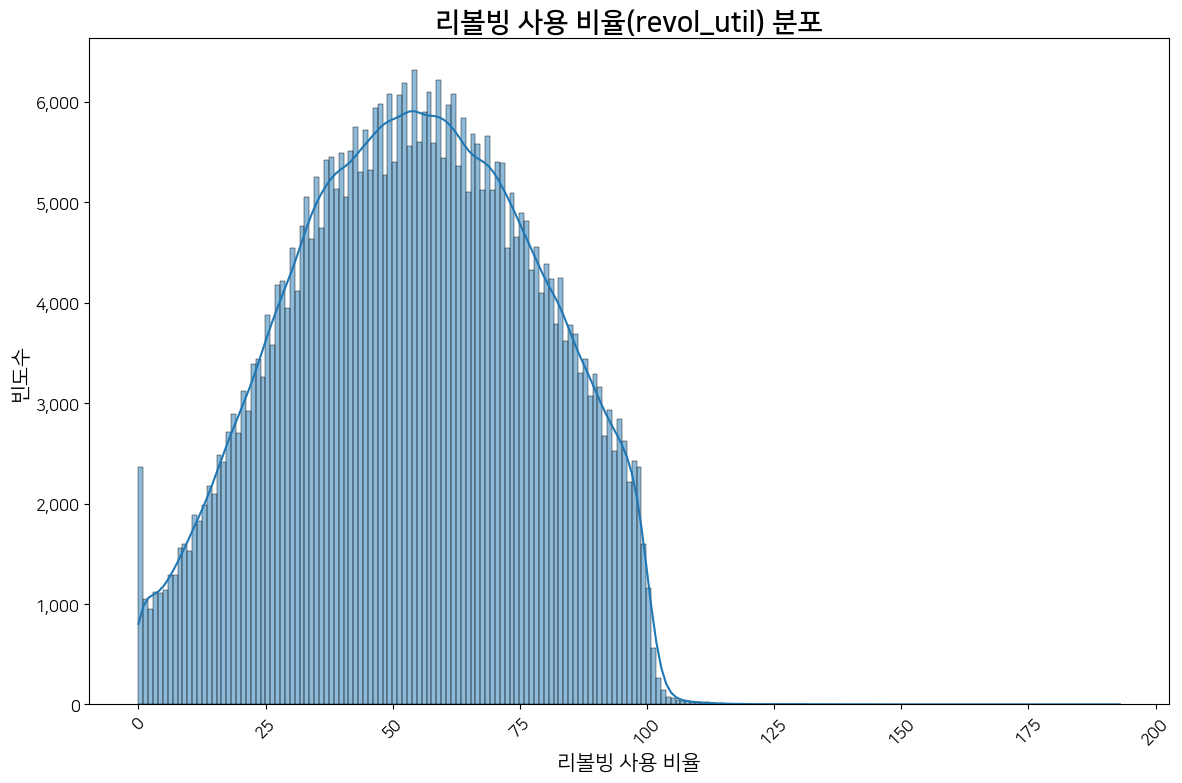

In [31]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='revol_util', kde=True)

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('리볼빙 사용 비율(revol_util) 분포', fontsize=20, weight='bold')
ax.set_xlabel('리볼빙 사용 비율', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

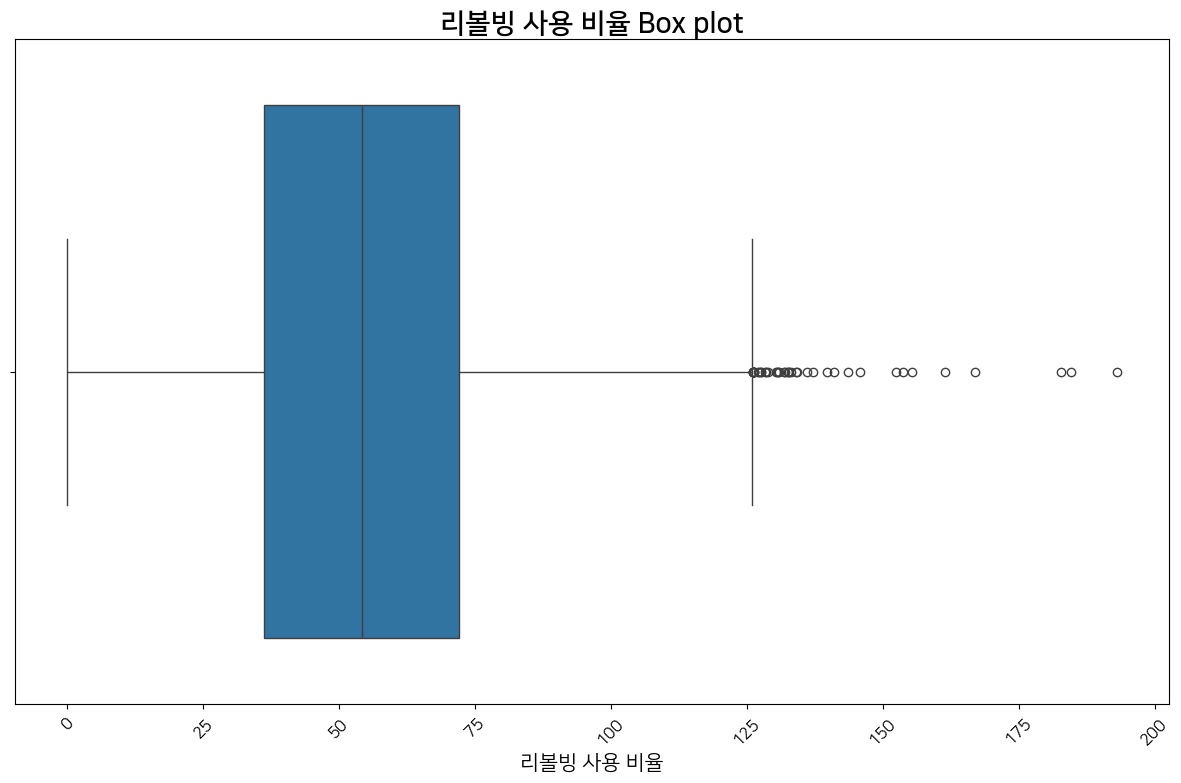

In [38]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='revol_util')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('리볼빙 사용 비율 Box plot', fontsize=20, weight='bold')
ax.set_xlabel('리볼빙 사용 비율', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
df['revol_util'].value_counts()

revol_util
0.0      1256
52.0      932
61.0      925
59.0      920
53.0      916
         ... 
126.3       1
130.8       1
123.3       1
121.4       1
184.6       1
Name: count, Length: 1211, dtype: int64

- 신용점수(FICO)

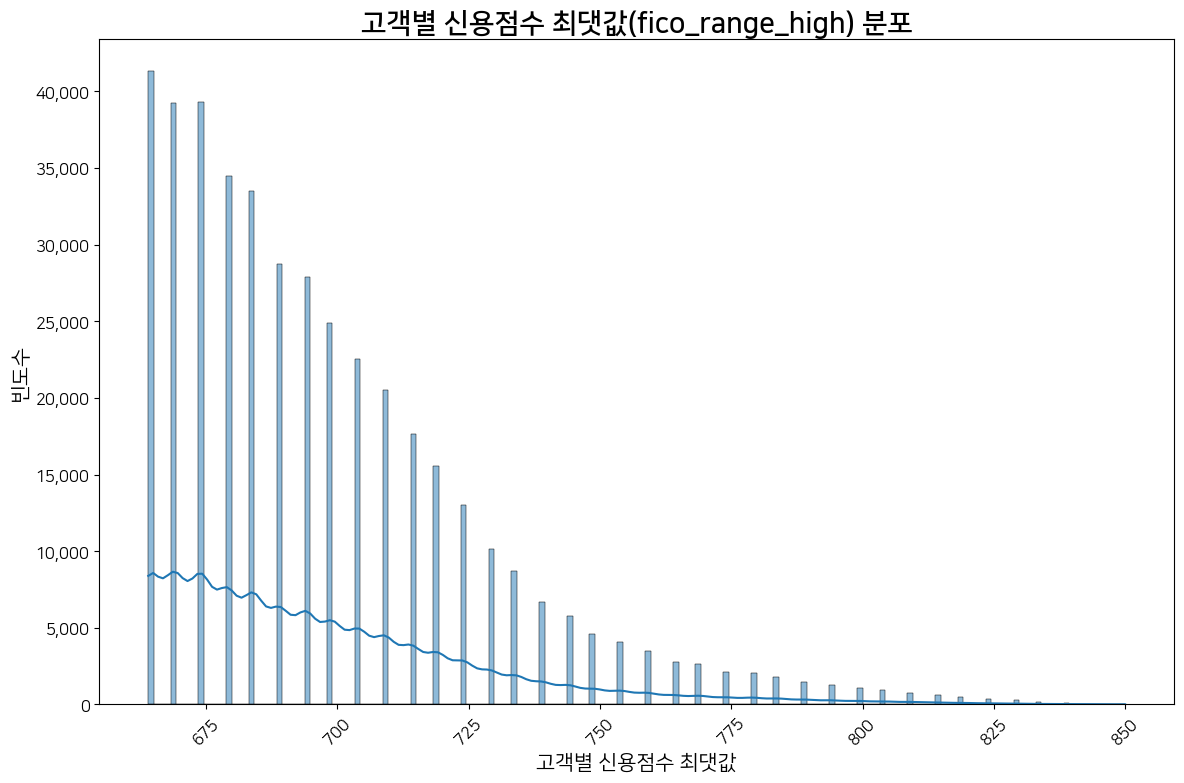

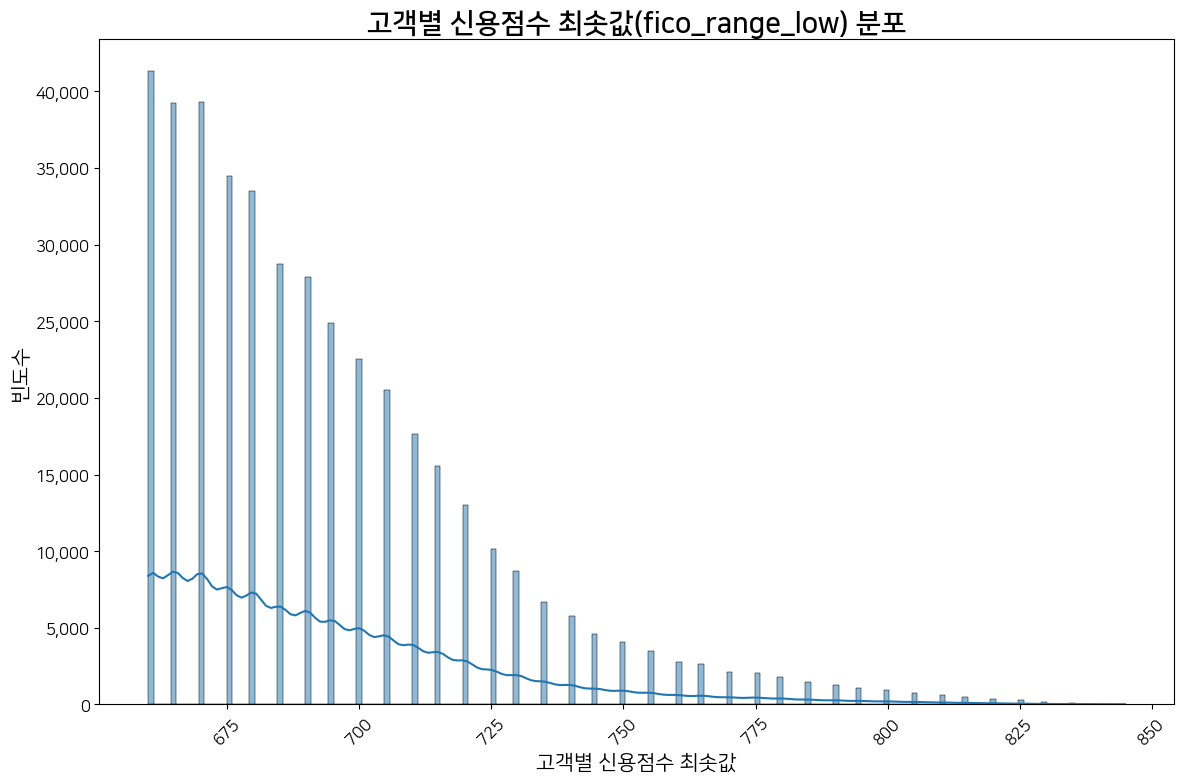

In [61]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='fico_range_high', kde=True)

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('고객별 신용점수 최댓값(fico_range_high) 분포', fontsize=20, weight='bold')
ax.set_xlabel('고객별 신용점수 최댓값', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 구간 분할

plt.figure(figsize=(12, 8))

ax = sns.histplot(data=df, x='fico_range_low', kde=True)

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('고객별 신용점수 최솟값(fico_range_low) 분포', fontsize=20, weight='bold')
ax.set_xlabel('고객별 신용점수 최솟값', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

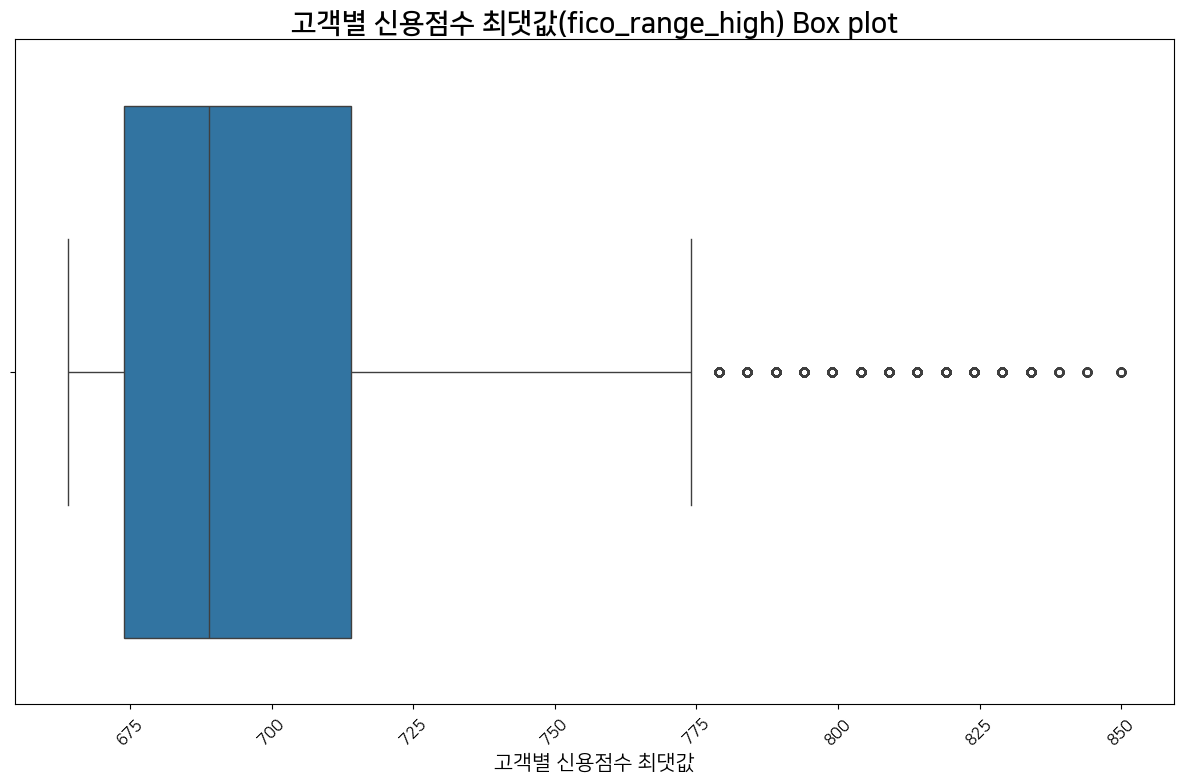

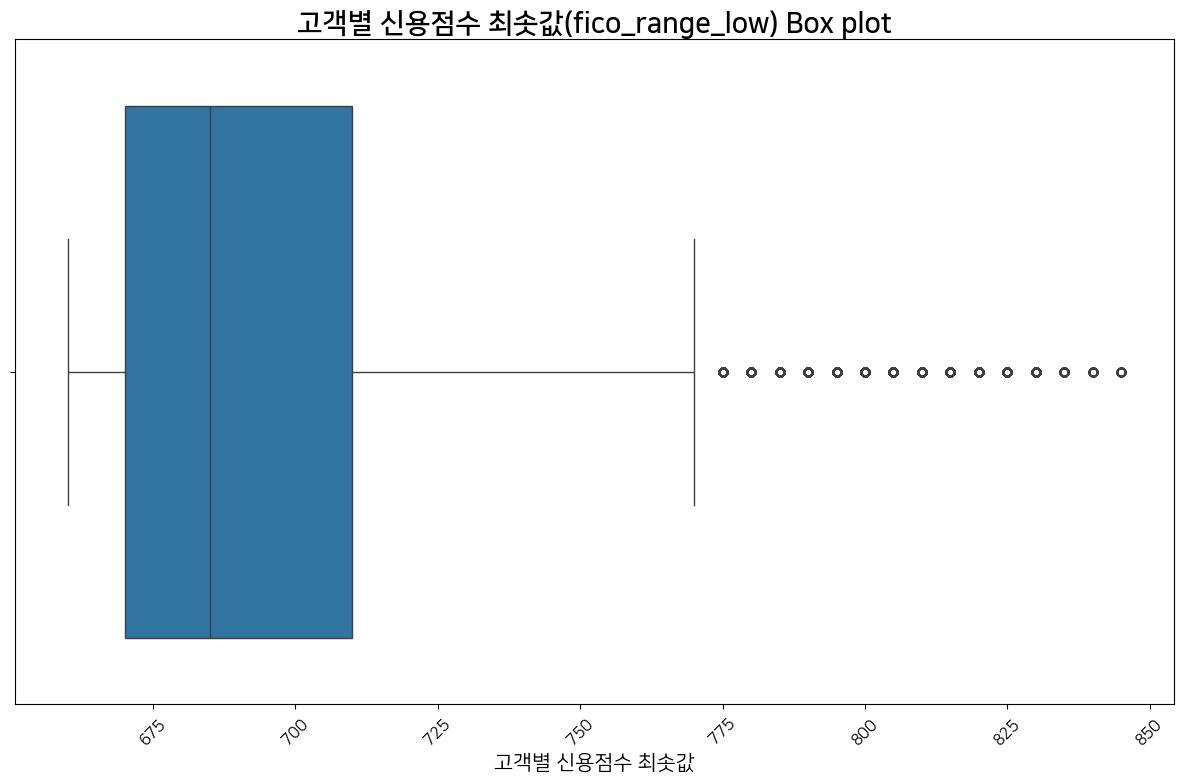

In [46]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='fico_range_high')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('고객별 신용점수 최댓값(fico_range_high) Box plot', fontsize=20, weight='bold')
ax.set_xlabel('고객별 신용점수 최댓값', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

##

plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='fico_range_low')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('고객별 신용점수 최솟값(fico_range_low) Box plot', fontsize=20, weight='bold')
ax.set_xlabel('고객별 신용점수 최솟값', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

얘는 두 값의 평균을 만든 다음 삭제하는게 나아보임

- 파산/압류 이력(pub_rec)

/tmp/ipykernel_874/4234539348.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='pub_rec', palette='Set2')


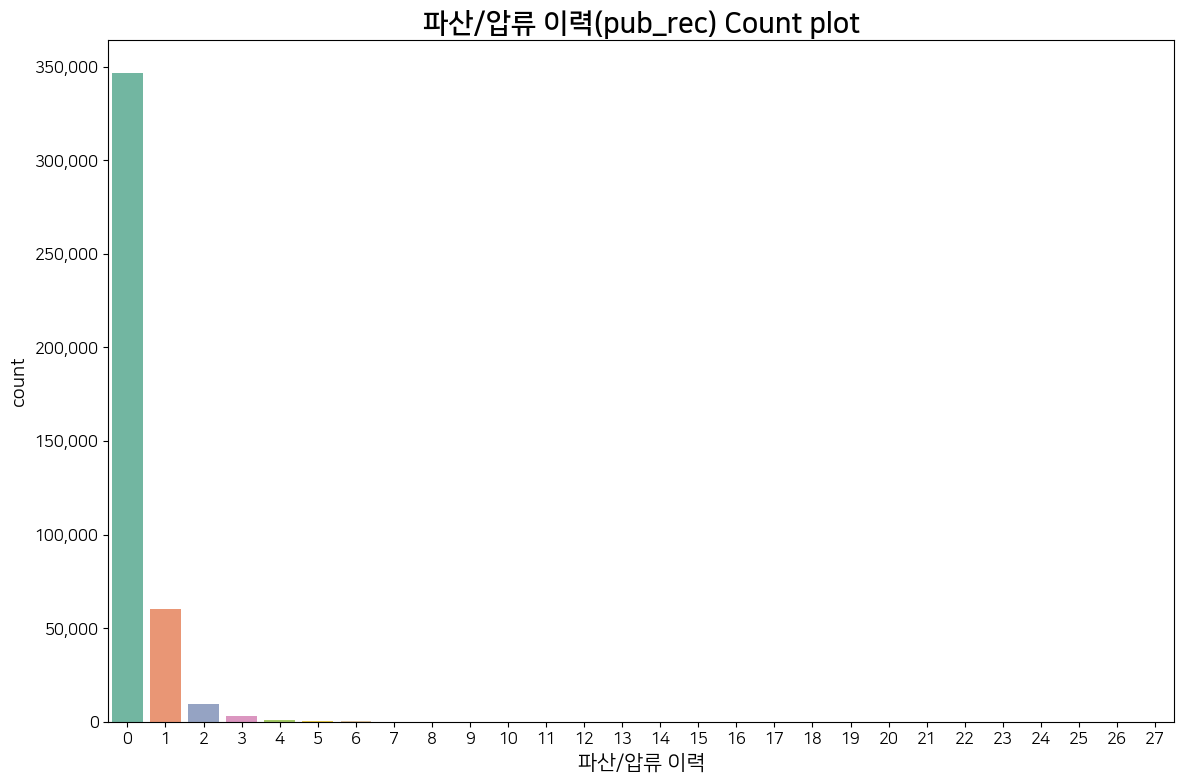

In [30]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='pub_rec', palette='Set2')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('파산/압류 이력(pub_rec) Count plot', fontsize=20, weight='bold')
ax.set_xlabel('파산/압류 이력', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

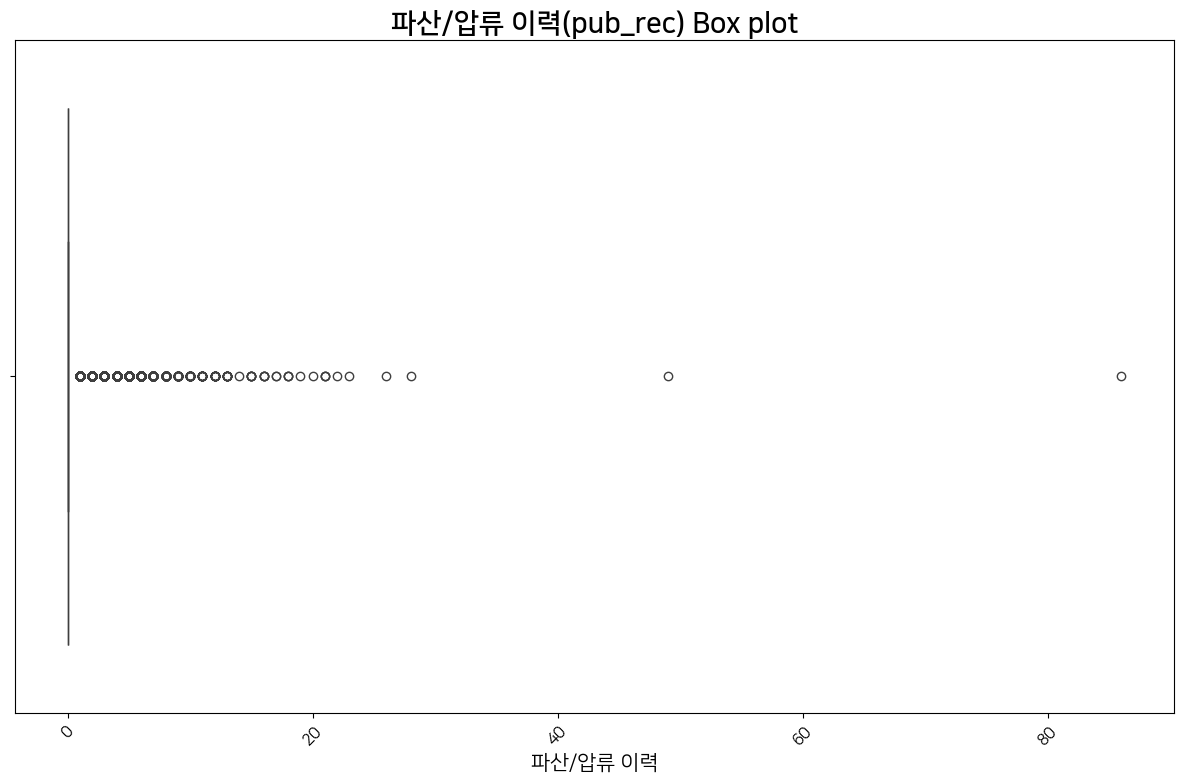

In [52]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='pub_rec')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('파산/압류 이력(pub_rec) Box plot', fontsize=20, weight='bold')
ax.set_xlabel('파산/압류 이력', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [62]:
df['pub_rec'].describe()

count    421095.000000
mean          0.233776
std           0.649778
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          86.000000
Name: pub_rec, dtype: float64

In [64]:
df.loc[ df['pub_rec']>5 ]

,loan_status,annual_inc,dti,loan_amnt,revol_bal,revol_util,fico_range_low,fico_range_high,pub_rec,delinq_2yrs,term,home_ownership,emp_length
2531,Fully Paid,90000.0,11.20,6000.0,4373.0,64.3,660.0,664.0,11.0,0.0,36 months,RENT,6 years
3000,Fully Paid,87261.0,7.89,10800.0,6165.0,51.4,670.0,674.0,7.0,0.0,60 months,RENT,2 years
3041,Fully Paid,250000.0,14.24,18000.0,9705.0,78.3,670.0,674.0,6.0,0.0,36 months,MORTGAGE,10+ years
3627,Fully Paid,160000.0,9.85,7200.0,19246.0,61.3,680.0,684.0,6.0,0.0,36 months,MORTGAGE,4 years
3672,Fully Paid,125000.0,14.88,27000.0,13100.0,30.3,660.0,664.0,9.0,0.0,60 months,MORTGAGE,5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417566,Charged Off,73000.0,22.77,5000.0,2095.0,19.2,685.0,689.0,7.0,0.0,36 months,MORTGAGE,7 years
418455,Fully Paid,60000.0,15.04,10000.0,7484.0,22.6,725.0,729.0,15.0,0.0,36 months,OWN,10+ years
419255,Fully Paid,50000.0,31.25,10000.0,32724.0,62.6,685.0,689.0,6.0,1.0,36 months,MORTGAGE,10+ years
420114,Fully Paid,248000.0,7.48,10000.0,14531.0,17.3,665.0,669.0,10.0,0.0,36 months,MORTGAGE,10+ years


- 지난 2년간 30일 이상의 연체 이력(delinq_2yrs)

/tmp/ipykernel_874/1492669579.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='delinq_2yrs', palette='Set2')


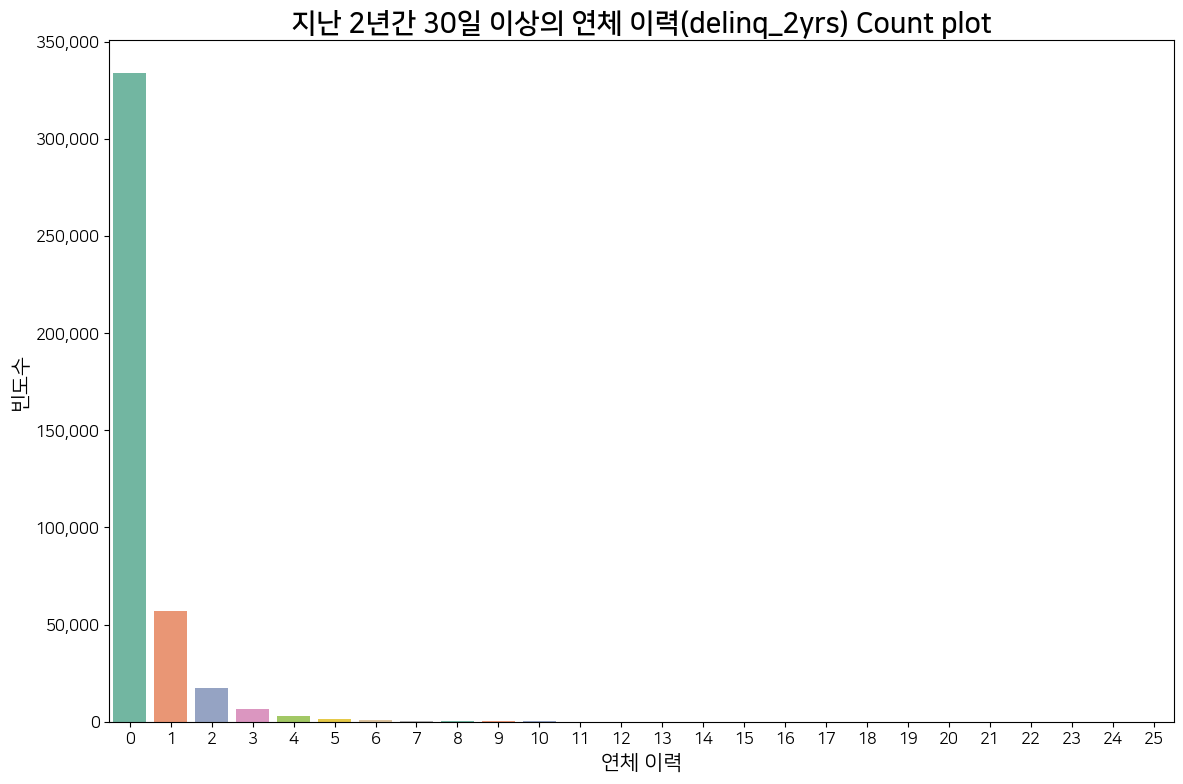

In [32]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.countplot(data=df, x='delinq_2yrs', palette='Set2')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('지난 2년간 30일 이상의 연체 이력(delinq_2yrs) Count plot', fontsize=20, weight='bold')
ax.set_xlabel('연체 이력', fontsize=15)
ax.set_ylabel('빈도수', fontsize=15)

# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

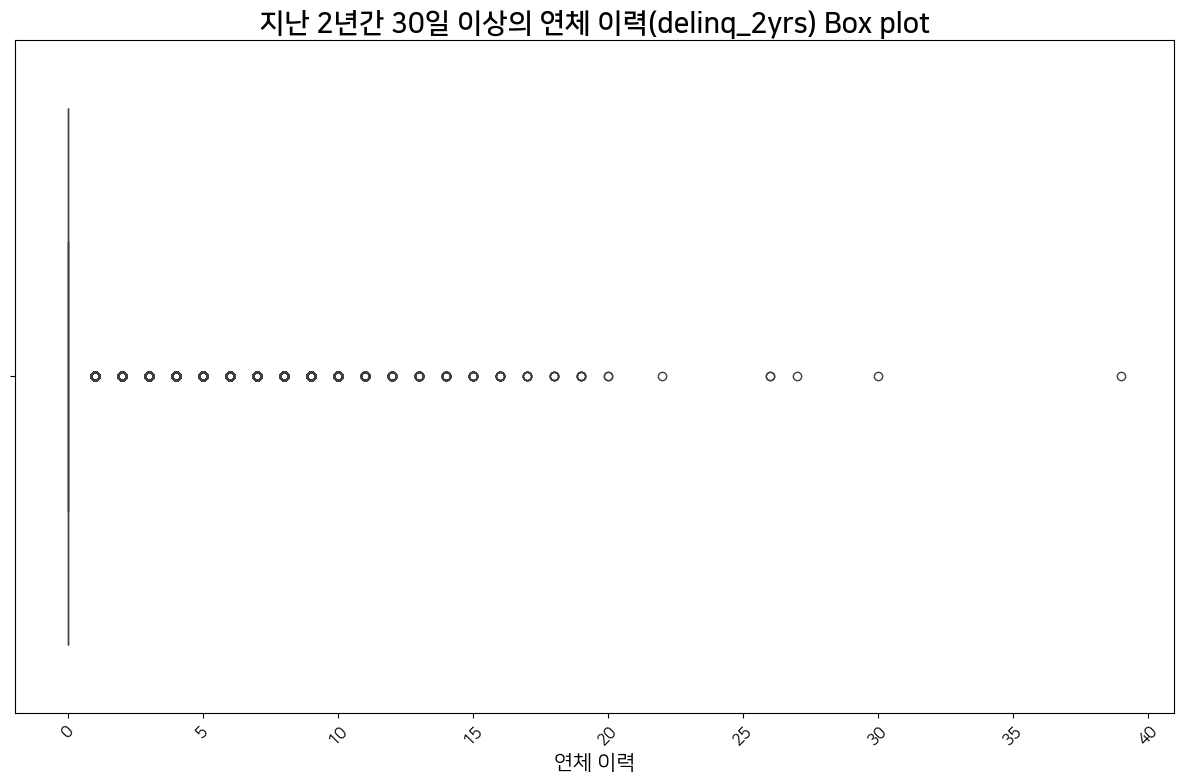

In [69]:
from matplotlib.ticker import FuncFormatter

def add_comma(value, pos):
    return f'{int(value):,}'


plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df, x='delinq_2yrs')

comma_formatter = FuncFormatter(add_comma)
ax.xaxis.set_major_formatter(comma_formatter)
# ax.yaxis.set_major_formatter(comma_formatter)

ax.set_title('지난 2년간 30일 이상의 연체 이력(delinq_2yrs) Box plot', fontsize=20, weight='bold')
ax.set_xlabel('연체 이력', fontsize=15)
# ax.set_ylabel('빈도수', fontsize=15)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [72]:
df['delinq_2yrs'].describe()

count    421095.000000
mean          0.347397
std           0.927695
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          39.000000
Name: delinq_2yrs, dtype: float64

In [74]:
df.loc[ df['delinq_2yrs']>0 ]

,loan_status,annual_inc,dti,loan_amnt,revol_bal,revol_util,fico_range_low,fico_range_high,pub_rec,delinq_2yrs,term,home_ownership,emp_length
1,Fully Paid,65000.0,16.06,24700.0,21470.0,19.2,715.0,719.0,0.0,1.0,36 months,MORTGAGE,10+ years
4,Fully Paid,104433.0,25.37,10400.0,21929.0,64.5,695.0,699.0,0.0,1.0,60 months,MORTGAGE,3 years
7,Fully Paid,85000.0,17.61,20000.0,826.0,5.7,705.0,709.0,0.0,1.0,36 months,MORTGAGE,10+ years
24,Fully Paid,100000.0,13.28,6000.0,8563.0,72.0,695.0,699.0,0.0,1.0,36 months,MORTGAGE,10+ years
25,Charged Off,35000.0,15.22,4225.0,1058.0,24.6,725.0,729.0,0.0,2.0,36 months,RENT,5 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421079,Fully Paid,40000.0,25.65,12000.0,8731.0,73.4,665.0,669.0,0.0,1.0,36 months,RENT,4 years
421083,Fully Paid,54000.0,13.22,10775.0,10776.0,25.8,710.0,714.0,0.0,1.0,36 months,RENT,< 1 year
421084,Fully Paid,57000.0,16.80,7000.0,2684.0,27.1,670.0,674.0,2.0,2.0,36 months,RENT,10+ years
421089,Charged Off,63000.0,23.69,12000.0,21110.0,69.7,685.0,689.0,0.0,1.0,36 months,MORTGAGE,< 1 year


파산/압류 이력이 있는 사람, 연체 이력이 있는 사람 각각 상태가 어떤지 보자

### 이변량 분석

- 파산/압류 이력이 없는 사람과 최소 1회 이상 있는 사람의 상태 비교

In [34]:
temp = df.copy()

temp['pub_rec_binary'] = 'N'
temp.loc[ temp['pub_rec']!=0, 'pub_rec_binary' ] = 'Y'

temp['pub_rec_binary'].value_counts()

pub_rec_binary
N    346680
Y     74415
Name: count, dtype: int64

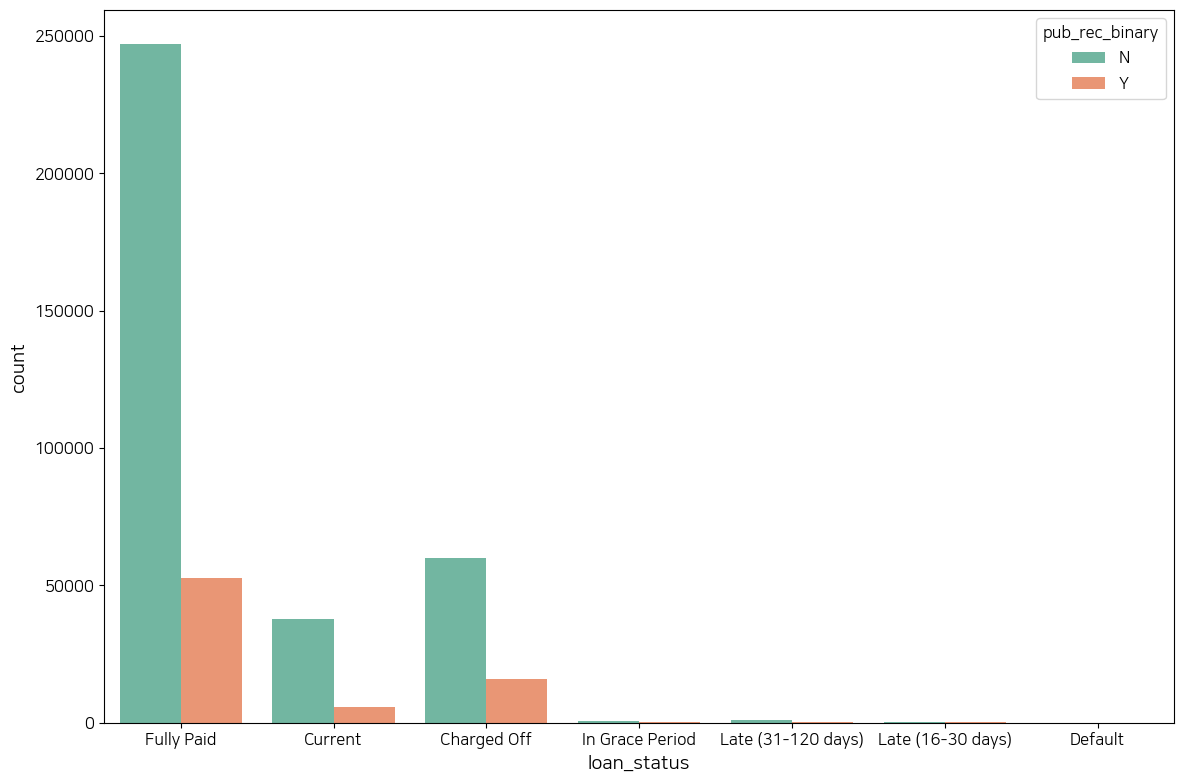

In [35]:
plt.figure(figsize=(12,8))

sns.countplot(data=temp, x='loan_status', hue='pub_rec_binary', palette='Set2')

plt.tight_layout()
plt.show()

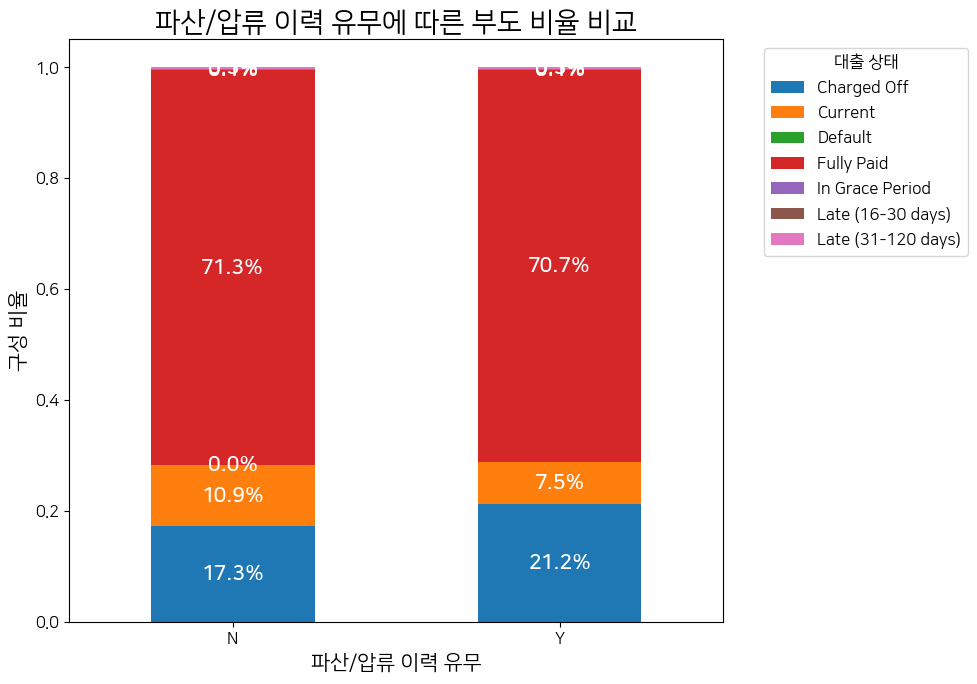

In [37]:
temp_ratio = temp.groupby('pub_rec_binary')['loan_status'].value_counts(normalize=True).unstack()

ax = temp_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='viridis'
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('파산/압류 이력 유무에 따른 부도 비율 비교', fontsize=20)
plt.xlabel('파산/압류 이력 유무', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

차이가 있다...! Charged Off가 4% 차이가 나네!

- 지난 2년동안 30일 이상 연체 이력이 없는 사람과 최소 1회 이상 있는 사람의 상태 비교

In [116]:
temp['delinq_2yrs_binary'] = 'N'
temp.loc[ temp['delinq_2yrs']!=0, 'delinq_2yrs_binary' ] = 'Y'

temp['delinq_2yrs_binary'].value_counts()

delinq_2yrs_binary
N    334008
Y     87087
Name: count, dtype: int64

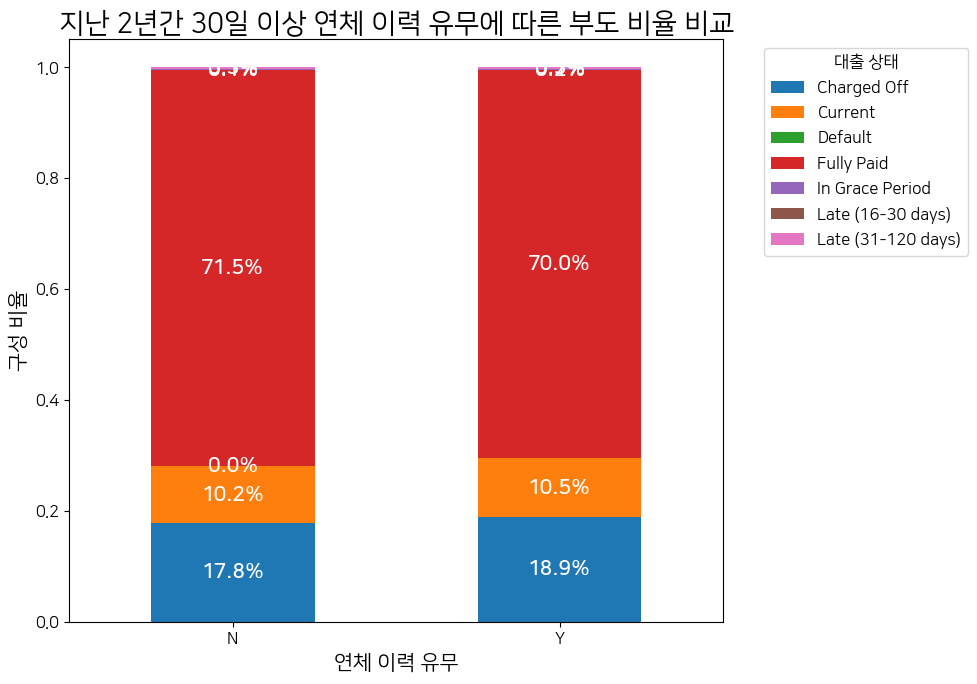

In [121]:
temp_ratio = temp.groupby('delinq_2yrs_binary')['loan_status'].value_counts(normalize=True).unstack()

ax = temp_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='viridis'
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('지난 2년간 30일 이상 연체 이력 유무에 따른 부도 비율 비교', fontsize=20)
plt.xlabel('연체 이력 유무', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

1.5% 정도의 차이를 의미가 있다고 할 수 있을까...? 의미가 있다고 설명하려면 어떻게 해야 하지??

- 근속 기간에 따른 부도 비율 비교
- 10+ years VS < 1 year
- junior VS middle VS senior

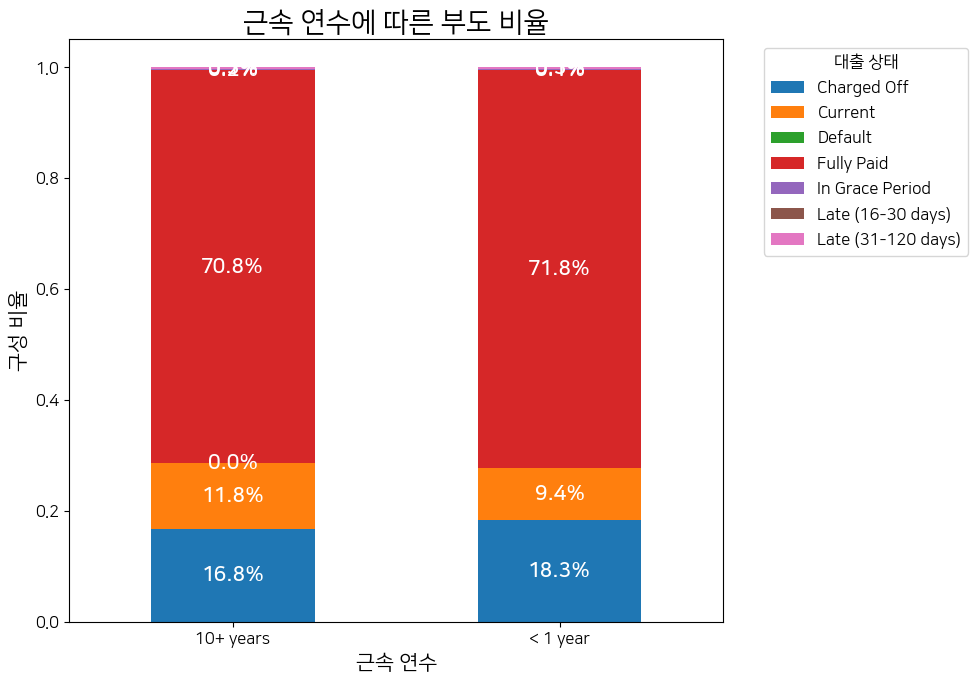

In [50]:
temp2 = df.loc[ (df['emp_length']=='10+ years')|(df['emp_length']=='< 1 year') ]

temp2_ratio = temp2.groupby('emp_length')['loan_status'].value_counts(normalize=True).unstack()

ax = temp2_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='Set2',
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('근속 연수에 따른 부도 비율', fontsize=20)
plt.xlabel('근속 연수', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [51]:
df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '1 year', '7 years',
       '8 years', '5 years', '2 years', '9 years', '< 1 year', nan],
      dtype=object)

In [54]:
temp['emp_grade'] = None

temp.loc[ (temp['emp_length']=='< 1 year')
       |(temp['emp_length']=='1 year')
       |(temp['emp_length']=='2 years')
       |(temp['emp_length']=='3 years')
       , 'emp_grade'] = 'junior'

temp.loc[ (temp['emp_length']=='4 years')
       |(temp['emp_length']=='5 years')
       |(temp['emp_length']=='6 years')
       |(temp['emp_length']=='7 years')
       , 'emp_grade'] = 'middle'

temp.loc[ (temp['emp_length']=='8 years')
       |(temp['emp_length']=='9 years')
       |(temp['emp_length']=='10+ years')
       , 'emp_grade'] = 'senior'

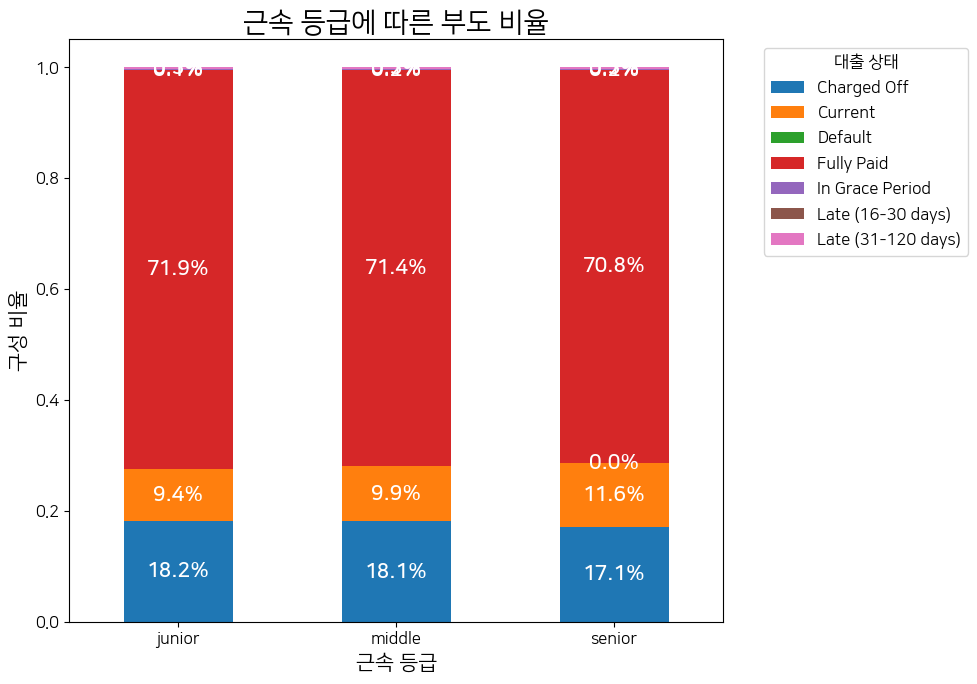

In [59]:
temp3_ratio = temp.groupby('emp_grade')['loan_status'].value_counts(normalize=True).unstack()

ax = temp3_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='Set2',
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('근속 등급에 따른 부도 비율', fontsize=20)
plt.xlabel('근속 등급', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
cols_numeric = ['annual_inc', ## 수치형 변수: 연수입
               'dti', ## 수치형 변수: 총부채 상환비율
               'loan_amnt', ## 수치형 변수: 신청 대출 금액
               'revol_bal', 'revol_util', ## 수치형 변수: 리볼빙 관련
               'fico_range_low', 'fico_range_high', ## 수치형 변수: 신용 점수
               'pub_rec', ## 수치형 변수: 공공 파산/압류 기록
               'delinq_2yrs', ## 수치형 변수: 지난 2년간 30일 이상 연체한 횟수
               ]

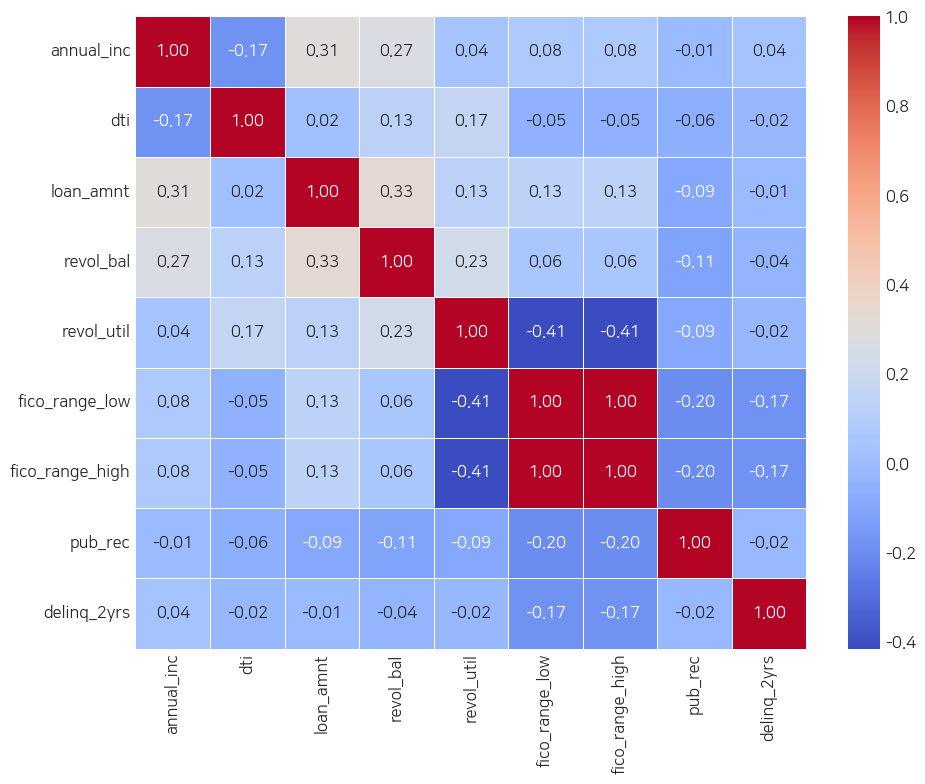

In [59]:
plt.figure(figsize=(10,8))

sns.heatmap(df[cols_numeric].corr(),
            cmap='coolwarm',
            annot=True,
            fmt='.2f',
            linewidth=0.5,
            )

plt.tight_layout()
plt.show()

## FICO feature engneering

In [60]:
df['fico_mean'] = (df['fico_range_high'] + df['fico_range_low']) / 2

/tmp/ipykernel_874/623580613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fico_mean'] = (df['fico_range_high'] + df['fico_range_low']) / 2


In [62]:
df = df.drop(['fico_range_high', 'fico_range_low'], axis=1)

In [63]:
df.columns

Index(['loan_status', 'annual_inc', 'dti', 'loan_amnt', 'revol_bal',
       'revol_util', 'pub_rec', 'delinq_2yrs', 'term', 'home_ownership',
       'emp_length', 'fico_mean'],
      dtype='object')

## drop NaN

In [64]:
df = df.dropna()
df = df.reset_index(drop=True)

## one-hot encoding

In [65]:
df = pd.get_dummies(df,
                    columns=['term',
                             'home_ownership',
                            #  'purpose',
                             ],
                    drop_first=True, dtype=int)

## to numeric

In [66]:
emp_length_map = {'< 1 year': 0,
                  '1 year': 1,
                  '2 years': 2,
                  '3 years': 3,
                  '4 years': 4,
                  '5 years': 5,
                  '6 years': 6,
                  '7 years': 7,
                  '8 years': 8,
                  '9 years': 9,
                  '10+ years': 10
                  }

df['emp_length_score'] = df['emp_length'].map(emp_length_map)

df = df.drop('emp_length', axis=1)
df = df.reset_index(drop=True)

## target setting

In [67]:
df = df.loc[ df['loan_status']!='In Grace Period' , ]

status_map = {'Fully Paid': 0,
              'Current': 0,
              'Charged Off': 1,
              'Late (31-120 days)': 1,
              'Late (16-30 days)': 1,
              'Default': 1,
              }

df['loan_status'] = df['loan_status'].map(status_map)

df = df.reset_index(drop=True)

## After preprocessing

In [73]:
temp4 = df.copy()

temp4['pub_rec_binary'] = 'N'
temp4.loc[ temp4['pub_rec']!=0, 'pub_rec_binary' ] = 'Y'

temp4['delinq_2yrs_binary'] = 'N'
temp4.loc[ temp4['delinq_2yrs']!=0, 'delinq_2yrs_binary' ] = 'Y'

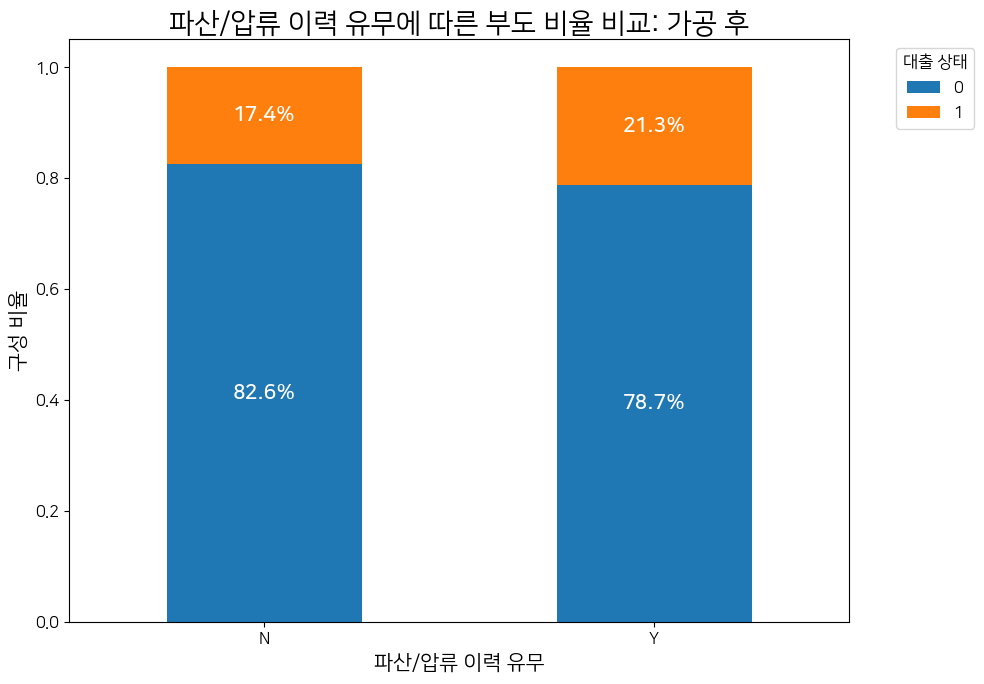

In [70]:
temp4_ratio = temp4.groupby('pub_rec_binary')['loan_status'].value_counts(normalize=True).unstack()

ax = temp4_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='viridis'
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('파산/압류 이력 유무에 따른 부도 비율 비교: 가공 후', fontsize=20)
plt.xlabel('파산/압류 이력 유무', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

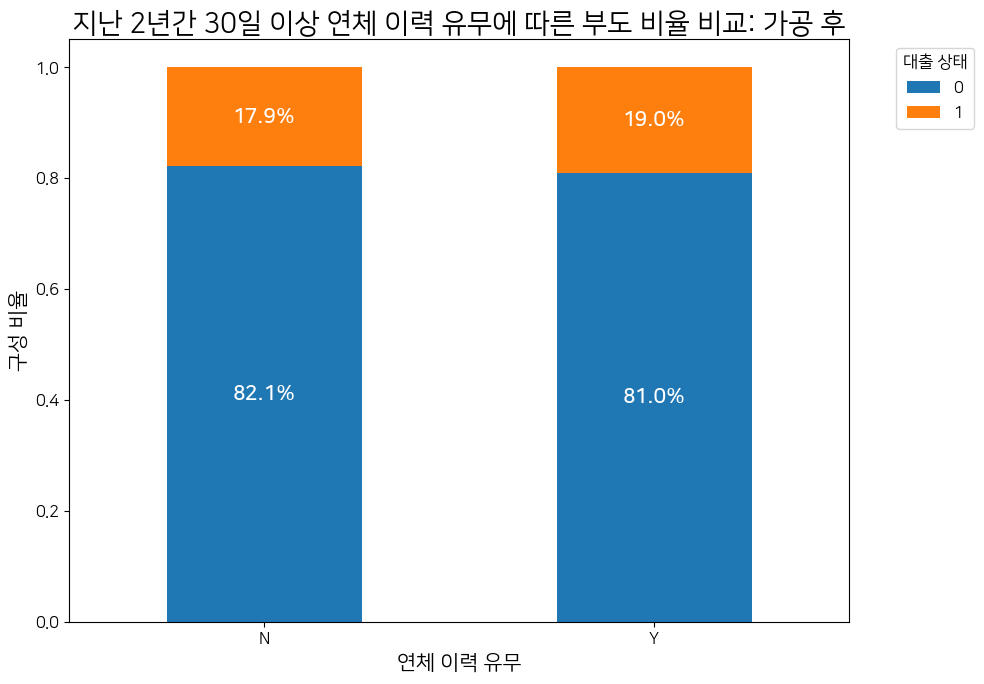

In [74]:
temp4_ratio = temp4.groupby('delinq_2yrs_binary')['loan_status'].value_counts(normalize=True).unstack()

ax = temp4_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='viridis'
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('지난 2년간 30일 이상 연체 이력 유무에 따른 부도 비율 비교: 가공 후', fontsize=20)
plt.xlabel('연체 이력 유무', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
temp4['emp_length_score']

0         10
1         10
2         10
3         10
4          3
          ..
396519     8
396520    10
396521     5
396522     1
396523    10
Name: emp_length_score, Length: 396524, dtype: int64

In [76]:
temp4['emp_grade'] = None

temp4.loc[ (temp4['emp_length_score']==0)
       |(temp4['emp_length_score']==1)
       |(temp4['emp_length_score']==2)
       |(temp4['emp_length_score']==3)
       , 'emp_grade'] = 'junior'

temp4.loc[ (temp4['emp_length_score']==4)
       |(temp4['emp_length_score']==5)
       |(temp4['emp_length_score']==6)
       |(temp4['emp_length_score']==7)
       , 'emp_grade'] = 'middle'

temp4.loc[ (temp4['emp_length_score']==8)
       |(temp4['emp_length_score']==9)
       |(temp4['emp_length_score']==10)
       , 'emp_grade'] = 'senior'

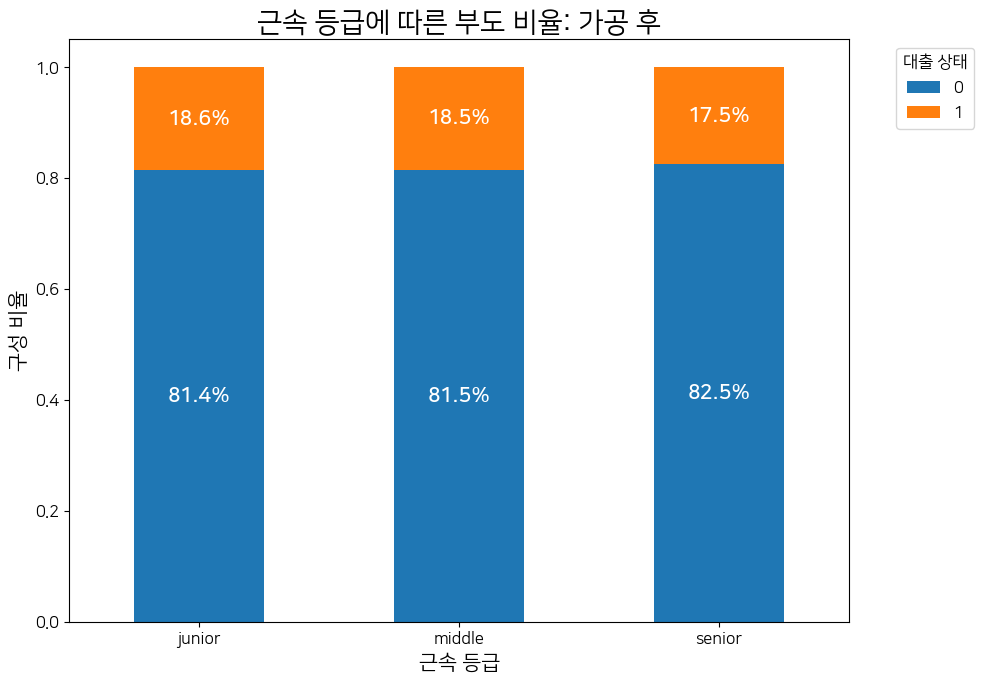

In [78]:
temp4_ratio = temp4.groupby('emp_grade')['loan_status'].value_counts(normalize=True).unstack()

ax = temp4_ratio.plot(kind='bar',
                     stacked=True,
                     figsize=(10,7),
                     rot=0,
                    #  colormap='Set2',
                     )

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1%}',
                ha='center',
                va='center',
                color='white',
                fontsize=15,
                fontweight='bold'
                )
        
plt.title('근속 등급에 따른 부도 비율: 가공 후', fontsize=20)
plt.xlabel('근속 등급', fontsize=15)
plt.ylabel('구성 비율', fontsize=15)
plt.legend(title='대출 상태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## dataset split

In [79]:
y = df['loan_status']
x = df.drop('loan_status', axis=1)

In [80]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## scaling

In [81]:
from sklearn.preprocessing import StandardScaler

ss_scaler = StandardScaler().set_output(transform='pandas')

x_train_ss = ss_scaler.fit_transform(x_train)
x_test_ss = ss_scaler.transform(x_test)

## oversampling

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train_ss, y_train)

## modeling

In [83]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42, max_iter=1000)

model_lr.fit(x_train_resampled, y_train_resampled)

y_pred_lr = model_lr.predict(x_test_ss)

## metrics

In [84]:
from sklearn.metrics import classification_report

In [85]:
print(classification_report(y_test, y_pred_lr) )

              precision    recall  f1-score   support

           0       0.88      0.61      0.72     64944
           1       0.26      0.62      0.37     14361

    accuracy                           0.61     79305
   macro avg       0.57      0.62      0.54     79305
weighted avg       0.77      0.61      0.65     79305



## SHAP

In [86]:
import shap
shap.initjs()

/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [87]:
explainer = shap.LinearExplainer(model_lr, x_train_resampled)

shap_values = explainer(x_train_resampled)

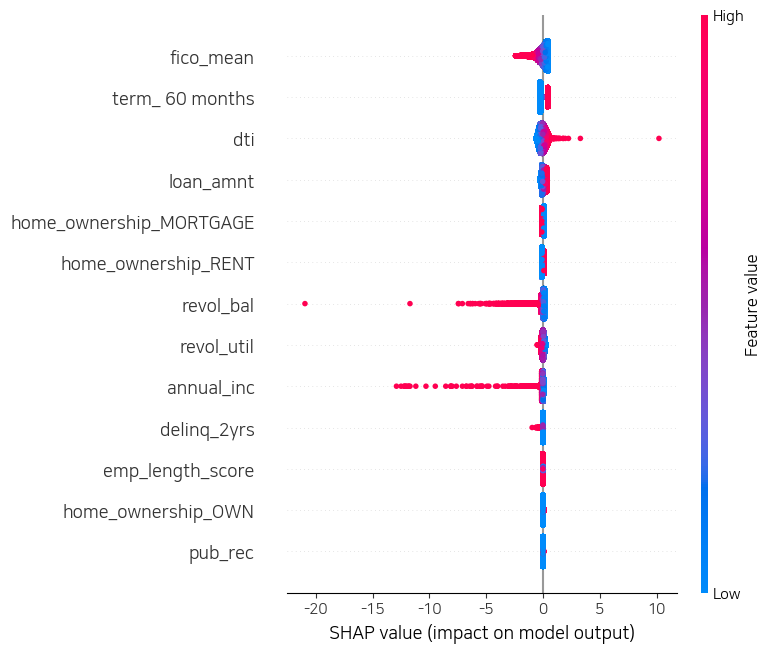

In [88]:
shap.summary_plot(shap_values, x_train_resampled,
                #   feature_names=x_train.columns
                  )

In [89]:
x_train_resampled

,annual_inc,dti,loan_amnt,revol_bal,revol_util,pub_rec,delinq_2yrs,fico_mean,term_ 60 months,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,emp_length_score
0,0.554289,-0.083876,-1.449179,-0.483407,-1.998188,-0.358521,-0.377097,2.888019,-0.709000,1.009200,-0.337962,-0.820010,-1.624440
1,-0.047290,-1.859420,-0.633266,-0.526154,1.096344,1.213480,-0.377097,-0.956038,1.410437,1.009200,-0.337962,-0.820010,0.262637
2,2.292183,-0.781618,2.280712,0.652889,0.718962,-0.358521,-0.377097,-0.120373,-0.709000,1.009200,-0.337962,-0.820010,-0.276528
3,-0.622132,0.043196,-0.729427,-0.465702,1.800791,-0.358521,-0.377097,-0.788905,-0.709000,1.009200,-0.337962,-0.820010,1.071384
4,-0.484438,-0.556354,-0.050470,-0.243115,1.339546,-0.358521,-0.377097,-1.123171,-0.709000,-0.990884,-0.337962,1.219497,-0.006946
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519547,1.889642,-0.765114,2.280712,0.370993,0.127227,2.076330,-0.377097,-0.470980,-0.709000,1.009200,-0.337962,-0.820010,1.071384
519548,-0.328872,2.021469,0.108638,-0.274042,0.151030,-0.358521,-0.377097,-0.226496,1.410437,-0.990884,-0.337962,1.219497,-1.440445
519549,-0.235146,1.105695,-1.438147,0.218309,-0.586876,-0.358521,-0.377097,-0.199576,-0.709000,-0.990884,2.958916,-0.820010,0.844386
519550,0.069093,0.336458,1.752738,0.081979,-1.464183,-0.358521,-0.377097,3.320623,1.410437,1.009200,-0.337962,-0.820010,-0.450974


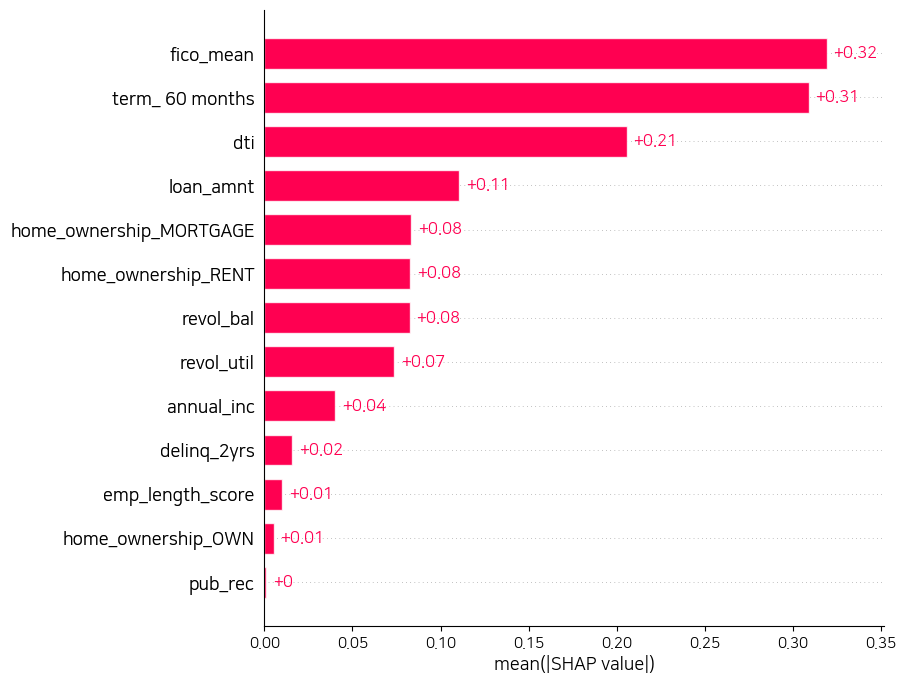

In [90]:
shap.plots.bar(shap_values, max_display=15)

/home/drkail/projects/aiffel_datathon/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumSquare.
  fig.canvas.print_figure(bytes_io, **kw)


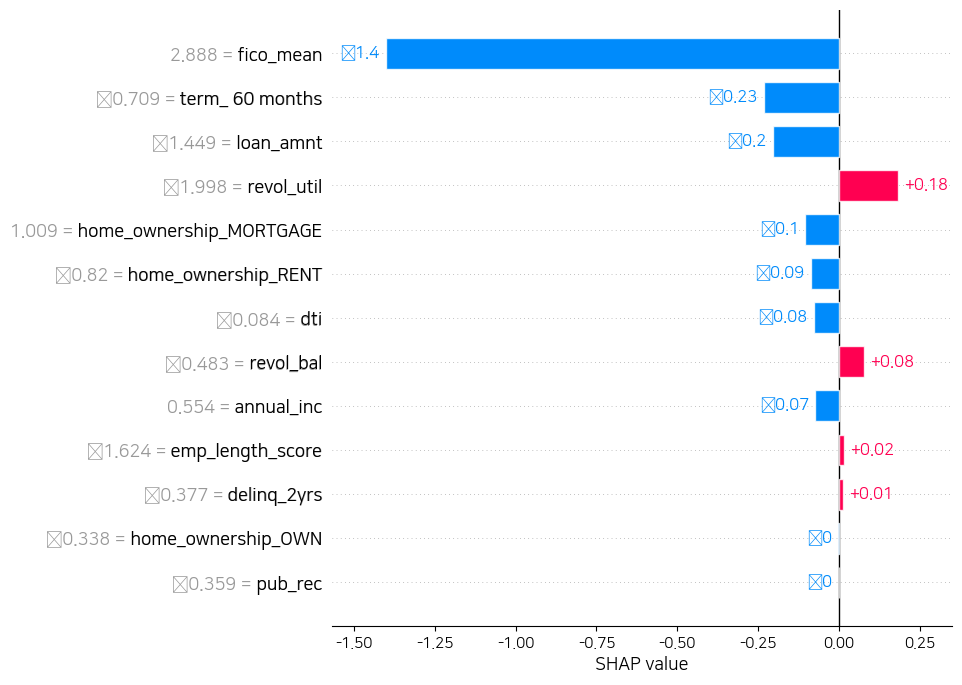

In [ ]:
shap.plots.bar(shap_values[0],
               max_display=15,
               )